In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm, kurtosis
from pandas.plotting import scatter_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

np.random.seed(42)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# <u>1.0 Load the data</u>

In [2]:
data = pd.read_csv("dataset.csv")
data.head(10)

gender NationalITy PlaceofBirth       StageID GradeID SectionID Topic Semester Relation  raisedhands  VisITedResources  AnnouncementsView  Discussion ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays Class
0      M          KW       KuwaIT    lowerlevel    G-04         A    IT        F   Father           15                16                  2          20                   Yes                     Good            Under-7     M
1      M          KW       KuwaIT    lowerlevel    G-04         A    IT        F   Father           20                20                  3          25                   Yes                     Good            Under-7     M
2      M          KW       KuwaIT    lowerlevel    G-04         A    IT        F   Father           10                 7                  0          30                    No                      Bad            Above-7     L
3      M          KW       KuwaIT    lowerlevel    G-04         A    IT        F   Father           30                25                  5          35                    No                      Bad            Above-7     L
4      M          KW       KuwaIT    lowerlevel    G-04         A    IT        F   Father           40                50                 12          50                    No                      Bad            Above-7     M
5      F          KW       KuwaIT    lowerlevel    G-04         A    IT        F   Father           42                30                 13          70                   Yes                      Bad            Above-7     M
6      M          KW       KuwaIT  MiddleSchool    G-07         A  Math        F   Father           35                12                  0          17                    No                      Bad            Above-7     L
7      M          KW       KuwaIT  MiddleSchool    G-07         A  Math        F   Father           50                10                 15          22                   Yes                     Good            Under-7     M
8      F          KW       KuwaIT  MiddleSchool    G-07         A  Math        F   Father           12                21                 16          50                   Yes                     Good            Under-7     M
9      F          KW       KuwaIT  MiddleSchool    G-07         B    IT        F   Father           70                80                 25          70                   Yes                     Good            Under-7     M

# <u>2.0 Exploratory Data Analysis</u>

<u>Data Shape</u>

In [3]:
print("Dataset shape:", data.shape)

Dataset shape: (480, 17)


<u>Column Names</u>

In [4]:
print("Column names:\n", data.columns)

Column names:
 Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'], dtype='object')


<u>View statistical properties of dataset </u>

In [5]:
print("Summary statistics:")
data.describe(include='all')

Summary statistics:


gender NationalITy PlaceofBirth       StageID GradeID SectionID Topic Semester Relation  raisedhands  VisITedResources  AnnouncementsView  Discussion ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays Class
count     480         480          480           480     480       480   480      480      480   480.000000        480.000000         480.000000  480.000000                   480                      480                480   480
unique      2          14           14             3      10         3    12        2        2          NaN               NaN                NaN         NaN                     2                        2                  2     3
top         M          KW       KuwaIT  MiddleSchool    G-02         A    IT        F   Father          NaN               NaN                NaN         NaN                   Yes                     Good            Under-7     M
freq      305         179          180           248     147       283    95      245      283          NaN               NaN                NaN         NaN                   270                      292                289   211
mean      NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN    46.775000         54.797917          37.918750   43.283333                   NaN                      NaN                NaN   NaN
std       NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN    30.779223         33.080007          26.611244   27.637735                   NaN                      NaN                NaN   NaN
min       NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN     0.000000          0.000000           0.000000    1.000000                   NaN                      NaN                NaN   NaN
25%       NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN    15.750000         20.000000          14.000000   20.000000                   NaN                      NaN                NaN   NaN
50%       NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN    50.000000         65.000000          33.000000   39.000000                   NaN                      NaN                NaN   NaN
75%       NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN    75.000000         84.000000          58.000000   70.000000                   NaN                      NaN                NaN   NaN
max       NaN         NaN          NaN           NaN     NaN       NaN   NaN      NaN      NaN   100.000000         99.000000          98.000000   99.000000                   NaN                      NaN                NaN   NaN

<u>View summary of dataset</u>

In [6]:
print("Information about the dataframe:")
data.info()

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    objec

<u>Check for missing values</u>

In [7]:
num_col = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
cat_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

for i, attr in enumerate(num_col, 1):
    non_null_count = data[attr].count()
    data_type = data[attr].dtype
    missing_percentages = (data[attr].isnull().sum() / len(data)) * 100
    
    print(f"Feature{i}: {attr}")
    print(f"Non-Null Count: {non_null_count}")
    print(f"Data Type: {data_type}")
    print(f"Missing Values (%): {missing_percentages:.2f}%")

print("\n")

Feature1: raisedhands
Non-Null Count: 480
Data Type: int64
Missing Values (%): 0.00%
Feature2: VisITedResources
Non-Null Count: 480
Data Type: int64
Missing Values (%): 0.00%
Feature3: AnnouncementsView
Non-Null Count: 480
Data Type: int64
Missing Values (%): 0.00%
Feature4: Discussion
Non-Null Count: 480
Data Type: int64
Missing Values (%): 0.00%




<u>Check for duplicate values</u>

In [8]:
duplicates = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 2


In [9]:
duplicates = data[data.duplicated(keep=False)]  # keep=False marks all duplicates as True

print("Duplicated rows:")
print(duplicates)

Duplicated rows:
    gender NationalITy PlaceofBirth     StageID GradeID SectionID   Topic Semester Relation  raisedhands  VisITedResources  AnnouncementsView  Discussion ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays Class
322      M      Jordan       Jordan  lowerlevel    G-02         A  French        F   Father           10                15                 10          21                    No                      Bad            Above-7     L
323      M      Jordan       Jordan  lowerlevel    G-02         A  French        S   Father           30                10                 20           5                    No                      Bad            Above-7     L
326      M      Jordan       Jordan  lowerlevel    G-02         A  French        F   Father           10                15                 10          21                    No                      Bad            Above-7     L
327      M      Jordan       Jordan  lowerlevel    G-02         A  French      

<u>Drop Duplicates</u>

In [10]:
rows_to_print = data.loc[[322, 323, 324, 325, 326, 327, 328]]
print(rows_to_print)

    gender NationalITy PlaceofBirth     StageID GradeID SectionID   Topic Semester Relation  raisedhands  VisITedResources  AnnouncementsView  Discussion ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays Class
322      M      Jordan       Jordan  lowerlevel    G-02         A  French        F   Father           10                15                 10          21                    No                      Bad            Above-7     L
323      M      Jordan       Jordan  lowerlevel    G-02         A  French        S   Father           30                10                 20           5                    No                      Bad            Above-7     L
324      M       Syria        Syria  lowerlevel    G-02         A  French        F   Father           24                35                 18          31                    No                      Bad            Under-7     M
325      M       Syria        Syria  lowerlevel    G-02         A  French        S   Father     

In [11]:
data_cleaned = data.drop_duplicates()

<u>Check if the duplicates are dropped</u>

In [12]:
duplicates = data_cleaned.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [13]:
data_cleaned.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic Semester Relation  raisedhands  VisITedResources  AnnouncementsView  Discussion ParentAnsweringSurvey ParentschoolSatisfaction StudentAbsenceDays Class
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT        F   Father           15                16                  2          20                   Yes                     Good            Under-7     M
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT        F   Father           20                20                  3          25                   Yes                     Good            Under-7     M
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT        F   Father           10                 7                  0          30                    No                      Bad            Above-7     L
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT        F   Father           30                25                  5          35                    No                      Bad            Above-7     L
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT        F   Father           40                50                 12          50                    No                      Bad            Above-7     M

In [14]:
data_cleaned.info()

rows_to_print = data_cleaned.loc[[322, 323, 324, 325, 328]]
print(rows_to_print)

<class 'pandas.core.frame.DataFrame'>
Index: 478 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    478 non-null    object
 1   NationalITy               478 non-null    object
 2   PlaceofBirth              478 non-null    object
 3   StageID                   478 non-null    object
 4   GradeID                   478 non-null    object
 5   SectionID                 478 non-null    object
 6   Topic                     478 non-null    object
 7   Semester                  478 non-null    object
 8   Relation                  478 non-null    object
 9   raisedhands               478 non-null    int64 
 10  VisITedResources          478 non-null    int64 
 11  AnnouncementsView         478 non-null    int64 
 12  Discussion                478 non-null    int64 
 13  ParentAnsweringSurvey     478 non-null    object
 14  ParentschoolSatisfaction  478 n

## <u>2.1 Explore Qualitative Data</u>

<u>Find categorical variables</u>

In [15]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 13 categorical variables

The categorical variables are :

 ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


<u>Frequency distribution of categorical variables</u>

In [16]:
for var in categorical: 
    
    print(data[var].value_counts())

gender
M    305
F    175
Name: count, dtype: int64
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64
SectionID
A    283
B    167
C     30
Name: count, dtype: int64
Topic
IT           95
French 

<u>Check distribution of Class</u>

C:\Users\Ken Wai\AppData\Local\Temp\ipykernel_14196\352109473.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=data_cleaned, palette="Set2", ax=ax[1])


Text(0.5, 1.0, 'Frequency distribution of Class variable')

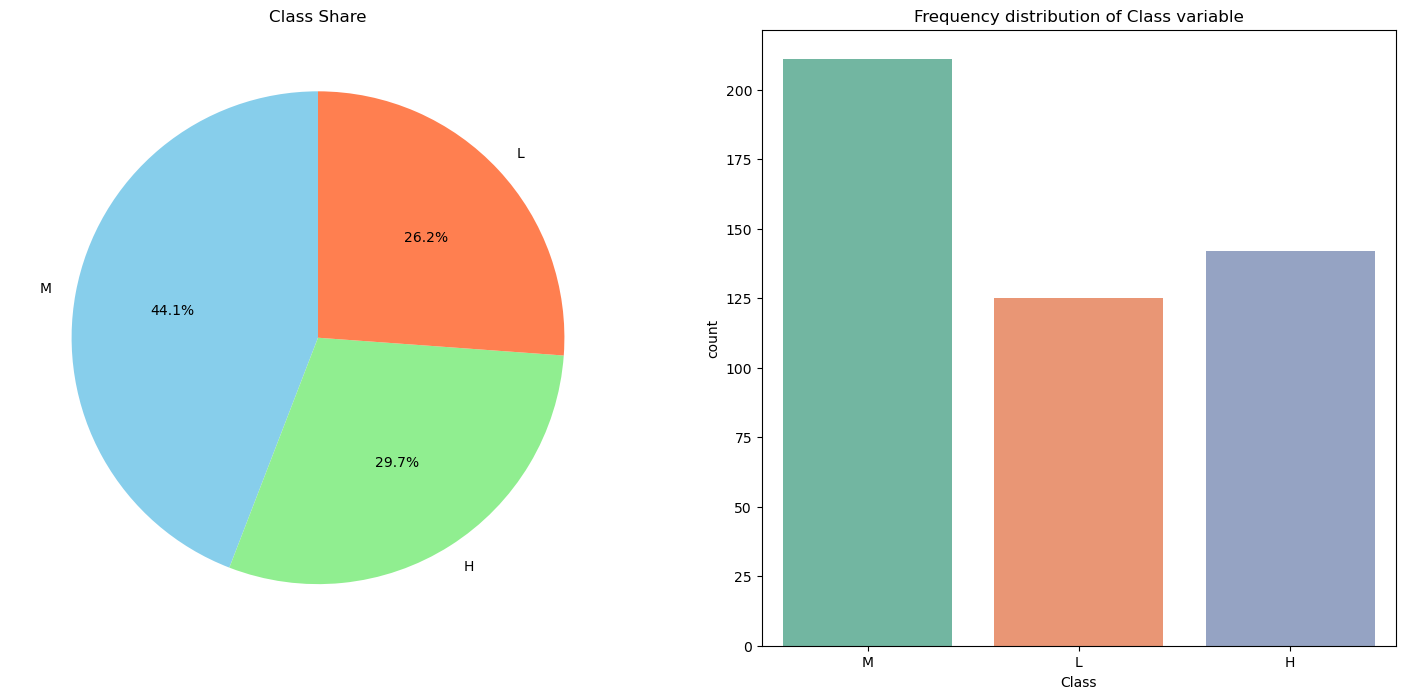

In [17]:
# visualize frequency distribution of CLass variable
class_counts = data_cleaned['Class'].value_counts()

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for class distribution
ax[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral'])
ax[0].set_title('Class Share')

# Count plot for class distribution
sns.countplot(x="Class", data=data_cleaned, palette="Set2", ax=ax[1])
ax[1].set_title("Frequency distribution of Class variable")

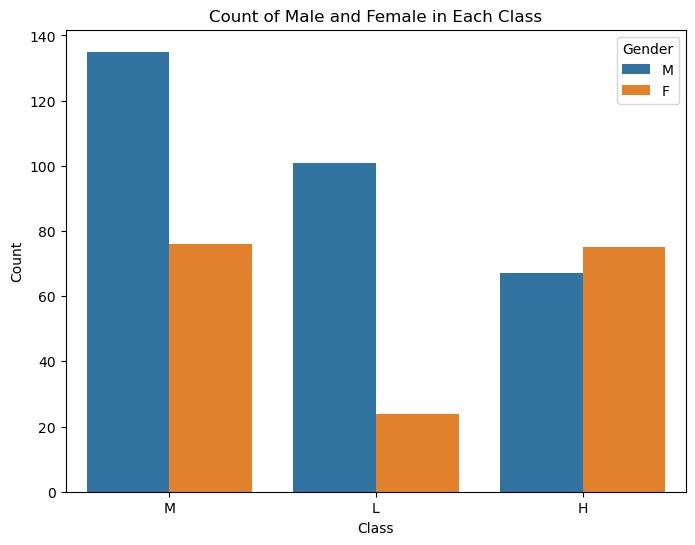

In [18]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Class', hue='gender')

# Add labels and title
plt.title('Count of Male and Female in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<u>Check distribution for other Discrete Variables</u>

C:\Users\Ken Wai\AppData\Local\Temp\ipykernel_14196\2988305898.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette='Set2')
C:\Users\Ken Wai\AppData\Local\Temp\ipykernel_14196\2988305898.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette='Set2')
C:\Users\Ken Wai\AppData\Local\Temp\ipykernel_14196\2988305898.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette='Set2')
C:\Users\Ken Wai\AppData\Local\

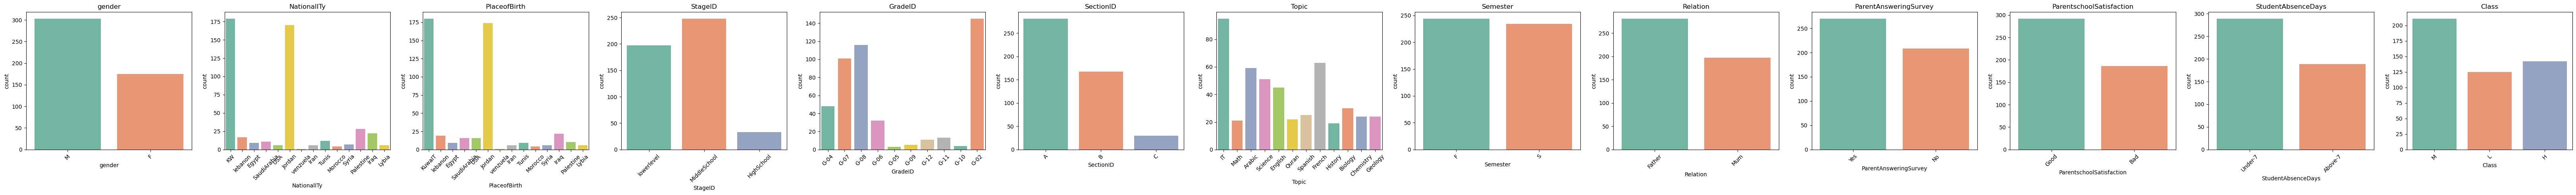

In [19]:
cat_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

n_cat = len(cat_col)

# Create subplots with 1 row and n_cat columns
fig, axes = plt.subplots(nrows=1, ncols=n_cat, figsize=(5 * n_cat, 5), sharex=False, sharey=False)

# Loop through each categorical column to create count plots
for i, col in enumerate(cat_col):
    sns.countplot(data=data_cleaned, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## <u>2.2 Explore Quantitative Data</u>

<u>Check distribution for Continuous Variables</u>

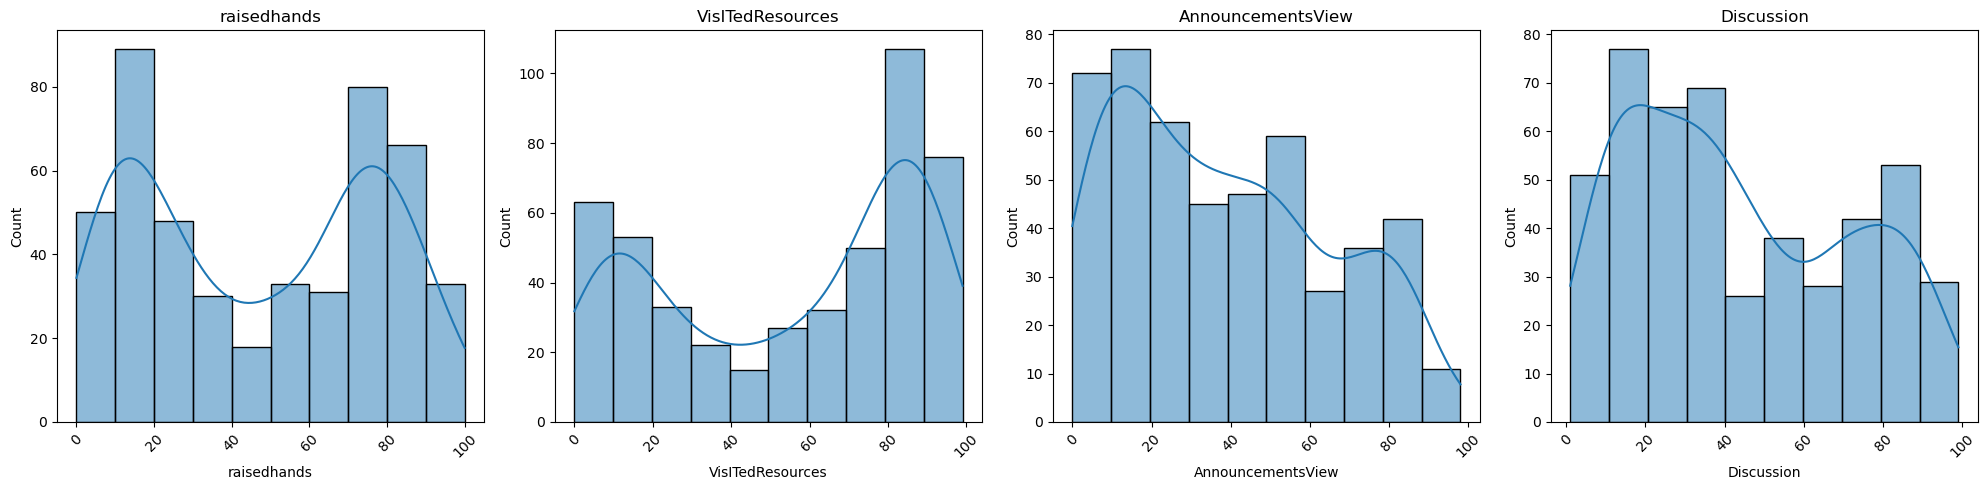

In [20]:
num_col = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

n_cont = len(num_col)
n_cat = 1  # Not used here but defined for completeness

# Create subplots with 1 row and n_cont columns
fig, axes = plt.subplots(nrows=1, ncols=n_cont, figsize=(5 * n_cont, 5), sharex=False, sharey=False)

# Loop through each numerical column to create distribution plots
for i, col in enumerate(num_col):
    sns.histplot(data_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<u>Check skewwness for Continuous Variables</u>

In [21]:
stats_summary = []

for col in num_col:
    skewness = skew(data_cleaned[col].dropna())  # Drop NaN values before calculation
    kurt = kurtosis(data_cleaned[col].dropna())  # Drop NaN values before calculation
    stats_summary.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurt})

# Convert to DataFrame for better readability
stats_df = pd.DataFrame(stats_summary)

print(stats_df)

              Column  Skewness  Kurtosis
0        raisedhands  0.019956 -1.494133
1   VisITedResources -0.351390 -1.471729
2  AnnouncementsView  0.391356 -1.008304
3         Discussion  0.356552 -1.130211


<u>Check outliers for Qualitative Variables</u>

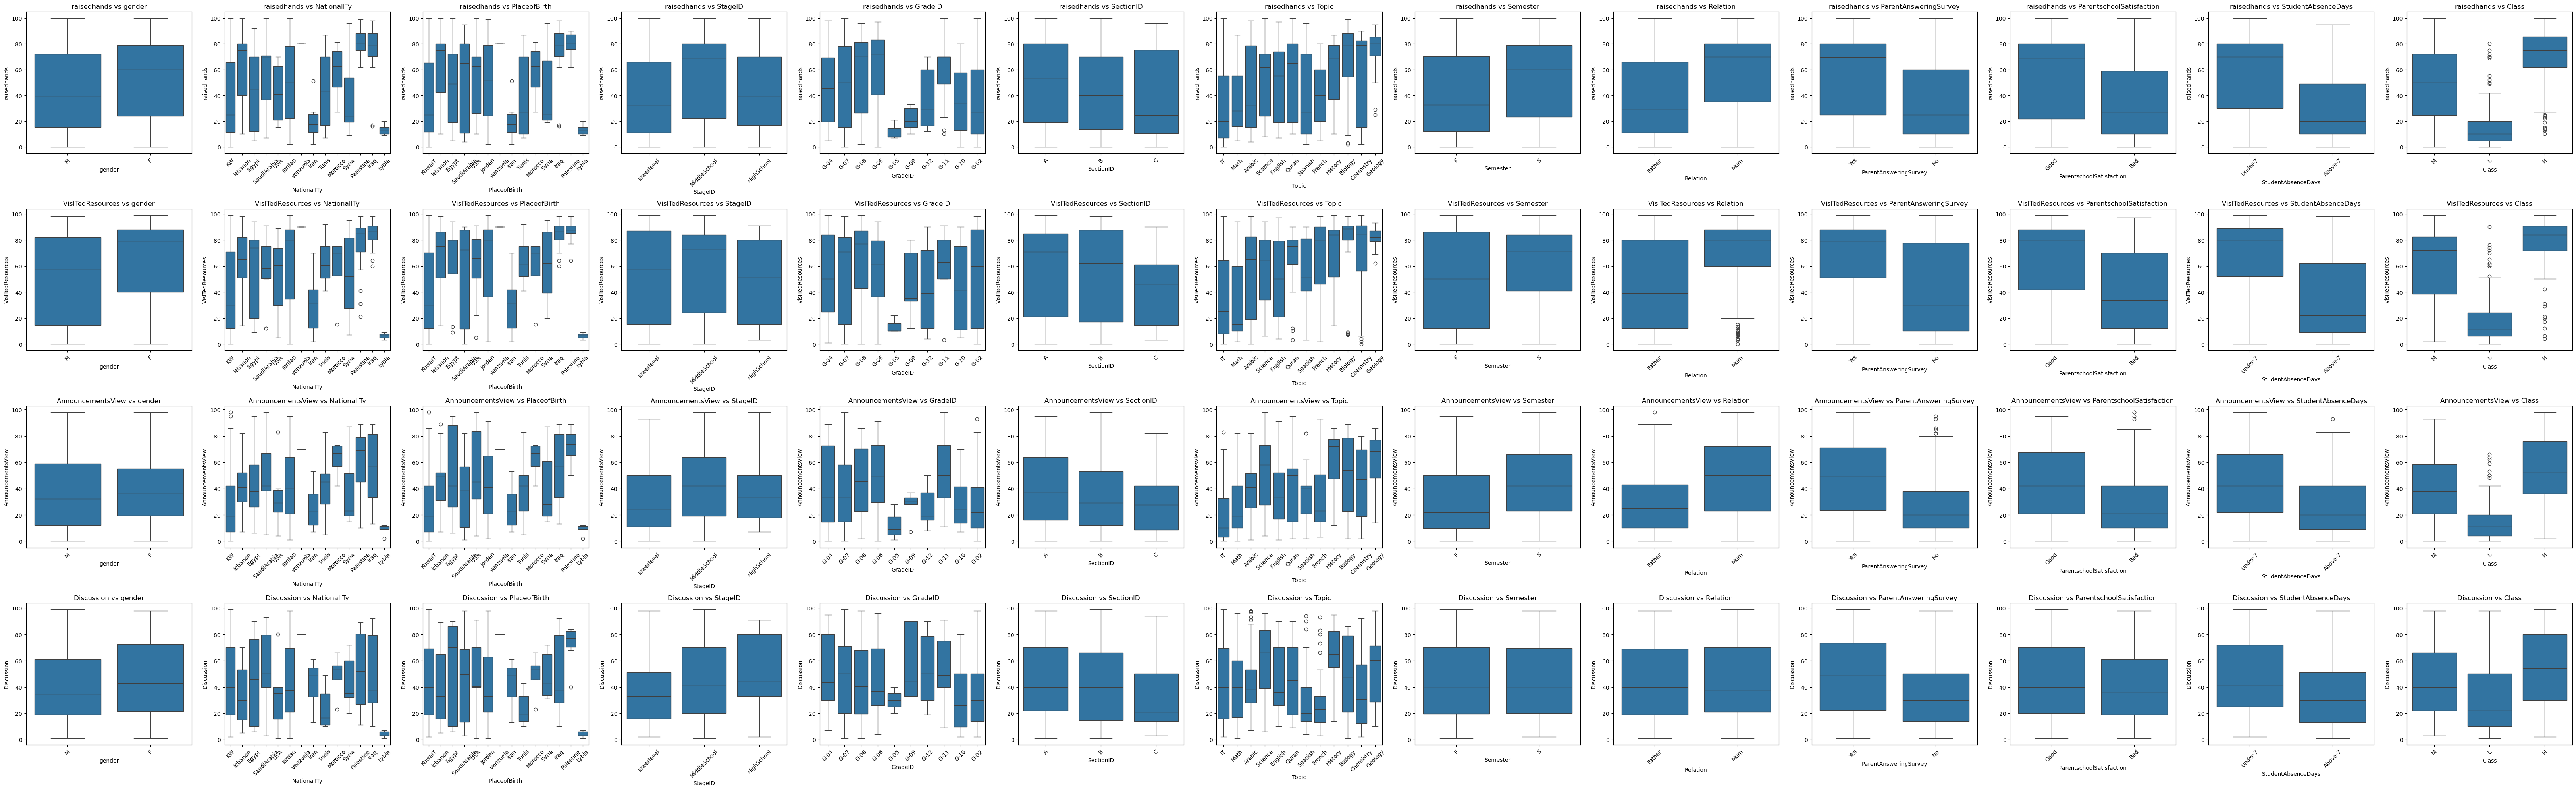

In [22]:
n_cont = len(num_col)  # Number of numerical columns
n_cat = len(cat_col)  # Number of categorical variables

# Create subplots with n_cont rows and n_cat columns
fig, axes = plt.subplots(nrows=n_cont, ncols=n_cat, figsize=(5 * n_cat, 5 * n_cont), sharex=False, sharey=False)

# Loop through each numerical column and each categorical variable to create box plots
for i, cont_col in enumerate(num_col):
    for j, cat_var in enumerate(cat_col):
        sns.boxplot(x=data_cleaned[cat_var], y=data_cleaned[cont_col], ax=axes[i, j])
        axes[i, j].set_title(f'{cont_col} vs {cat_var}')
        axes[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

<u>Correlation Matrix for Continuous Variables</u>

C:\Users\Ken Wai\AppData\Local\Temp\ipykernel_14196\649912416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Class'] = data_cleaned['Class'].astype('category')


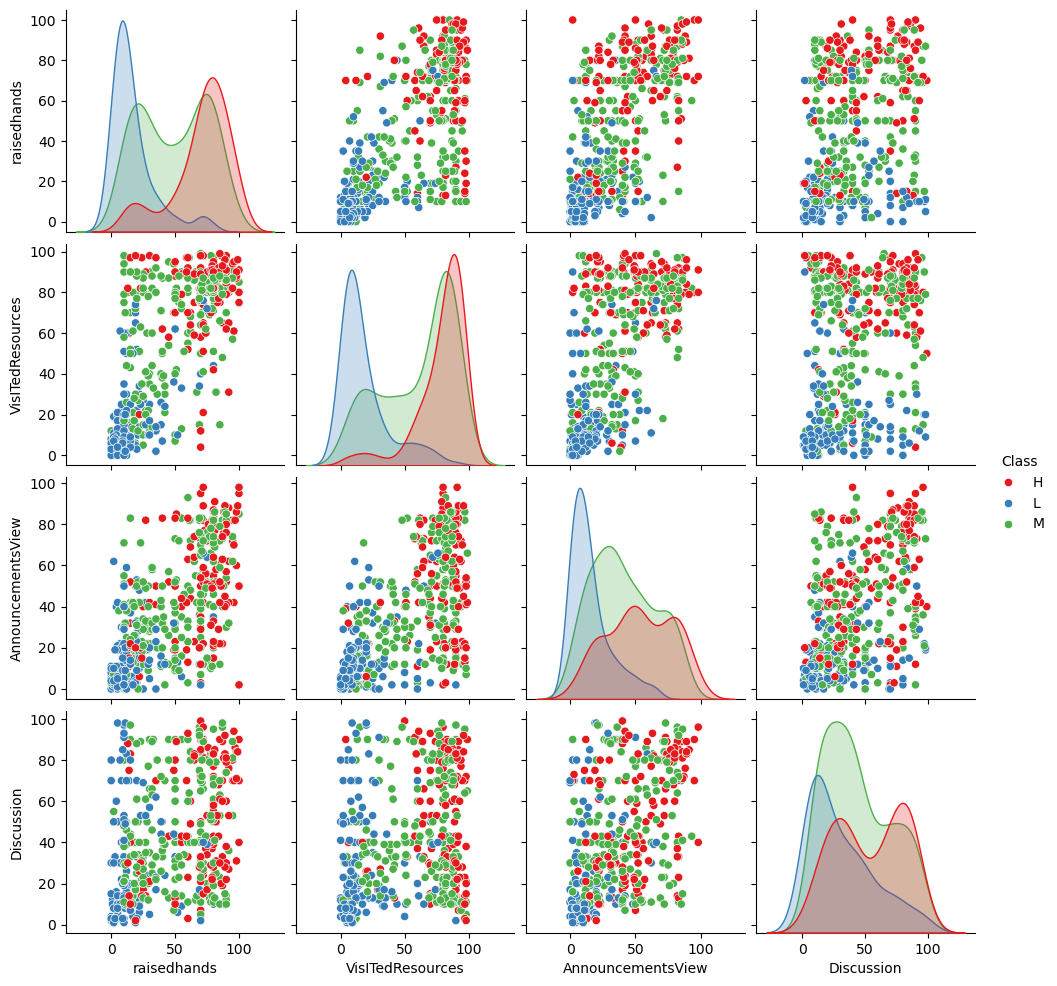

In [23]:
# Ensure your 'Class' column is treated as a categorical variable
data_cleaned['Class'] = data_cleaned['Class'].astype('category')

# Use pairplot to plot scatter plots for quantitative variables colored by the target variable 'Class'
sns.pairplot(data_cleaned, hue='Class', vars=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], palette="Set1", diag_kind='kde')

plt.show()

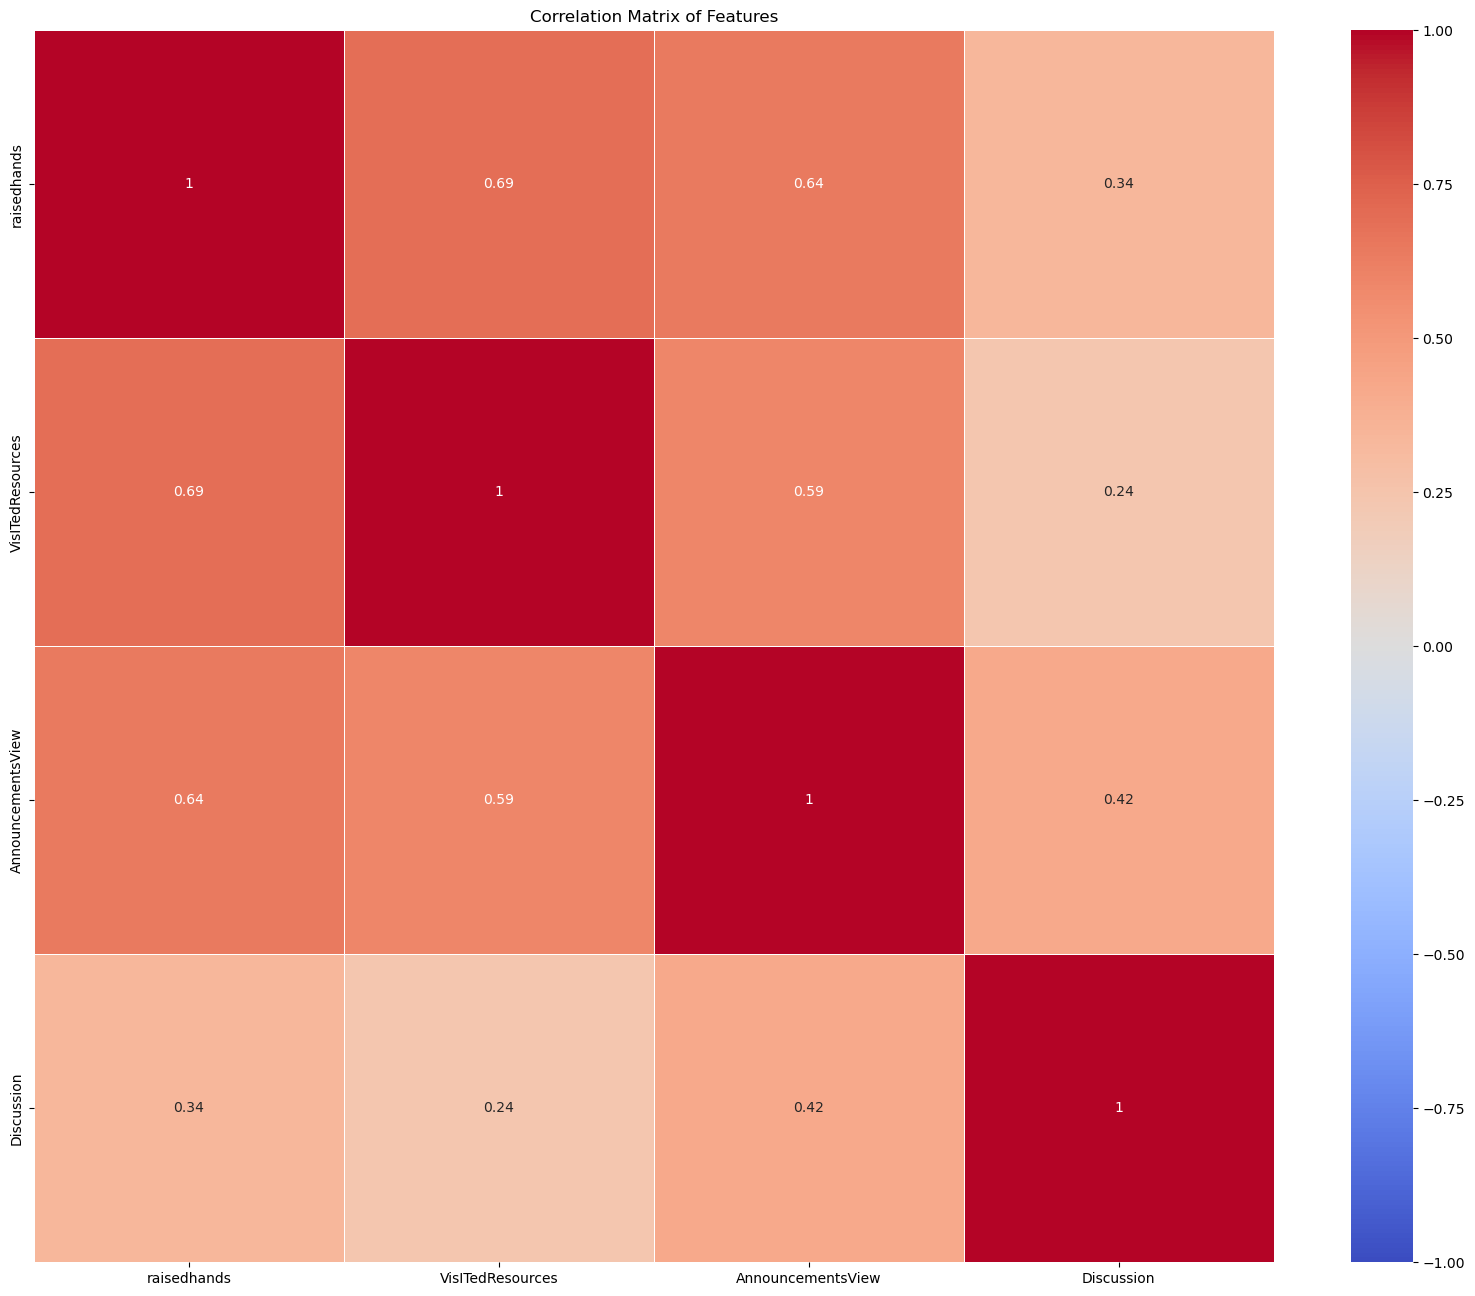

                   raisedhands  VisITedResources  AnnouncementsView  Discussion
raisedhands           1.000000          0.690635           0.642730    0.337300
VisITedResources      0.690635          1.000000           0.592948    0.238790
AnnouncementsView     0.642730          0.592948           1.000000    0.415355
Discussion            0.337300          0.238790           0.415355    1.000000


In [24]:
# Compute the correlation matrix
correlation_matrix = data_cleaned[num_col].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Features')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

# <u>3.0 Splitting the Data</u>

In [25]:
train_set, test_set = train_test_split(data_cleaned, random_state=42, test_size=0.2)

In [26]:
print("Length of train_set:", train_set.shape)
print("Length of test_set:", test_set.shape)

Length of train_set: (382, 17)
Length of test_set: (96, 17)


In [27]:
train_set.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

<u>Check distribution of Class</u>

C:\Users\Ken Wai\AppData\Local\Temp\ipykernel_14196\3822949678.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=train_set, palette="Set2", ax=ax[1])


Text(0.5, 1.0, 'Frequency distribution of Class variable')

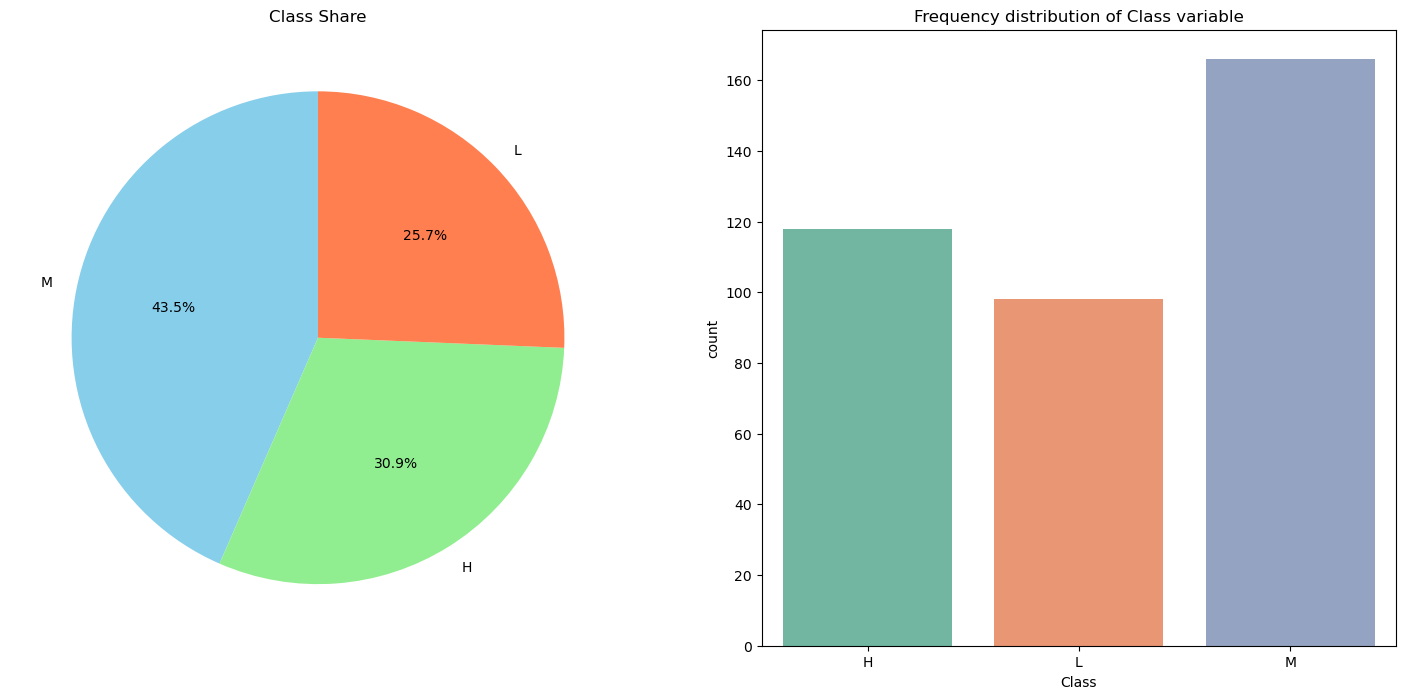

In [28]:
# visualize frequency distribution of CLass variable
class_counts = train_set['Class'].value_counts()

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for class distribution
ax[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'coral'])
ax[0].set_title('Class Share')

# Count plot for class distribution
sns.countplot(x="Class", data=train_set, palette="Set2", ax=ax[1])
ax[1].set_title("Frequency distribution of Class variable")

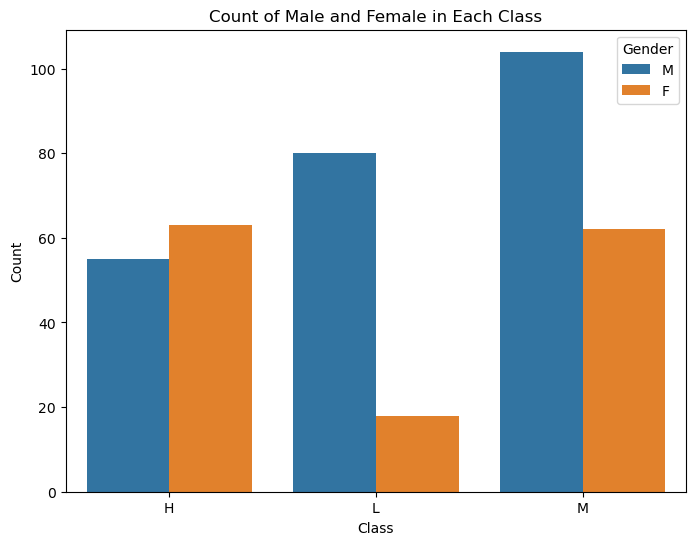

In [29]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=train_set, x='Class', hue='gender')

# Add labels and title
plt.title('Count of Male and Female in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<u>Check distribution for Continuous Variables</u>

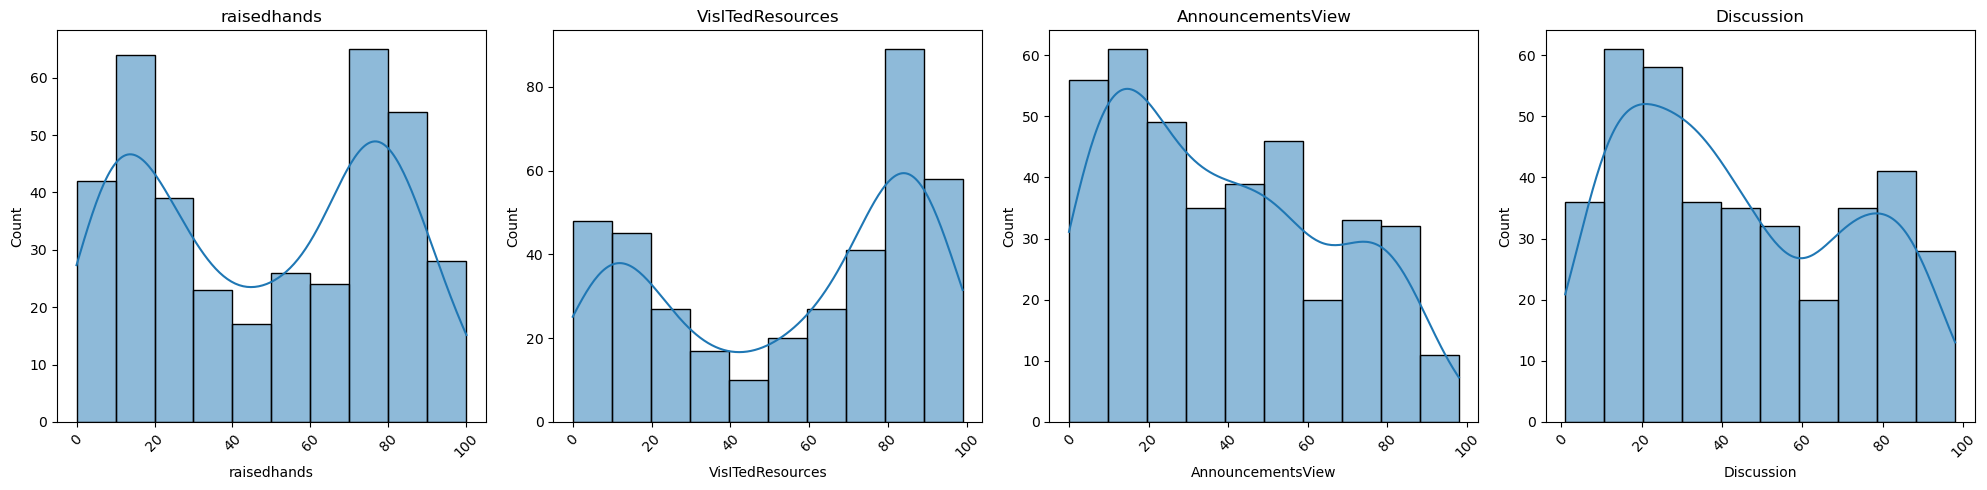

In [30]:
num_col = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

n_cont = len(num_col)
n_cat = 1  # Not used here but defined for completeness

# Create subplots with 1 row and n_cont columns
fig, axes = plt.subplots(nrows=1, ncols=n_cont, figsize=(5 * n_cont, 5), sharex=False, sharey=False)

# Loop through each numerical column to create distribution plots
for i, col in enumerate(num_col):
    sns.histplot(train_set[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<u>Check skewwness for Continuous Variables</u>

In [31]:
stats_summary = []

for col in num_col:
    skewness = skew(train_set[col].dropna())  # Drop NaN values before calculation
    kurt = kurtosis(train_set[col].dropna())  # Drop NaN values before calculation
    stats_summary.append({'Column': col, 'Skewness': skewness, 'Kurtosis': kurt})

# Convert to DataFrame for better readability
stats_df = pd.DataFrame(stats_summary)

print(stats_df)

              Column  Skewness  Kurtosis
0        raisedhands -0.021519 -1.479310
1   VisITedResources -0.371511 -1.464720
2  AnnouncementsView  0.373229 -1.042835
3         Discussion  0.324114 -1.176627


<u>Check outliers for Qualitative Variables</u>

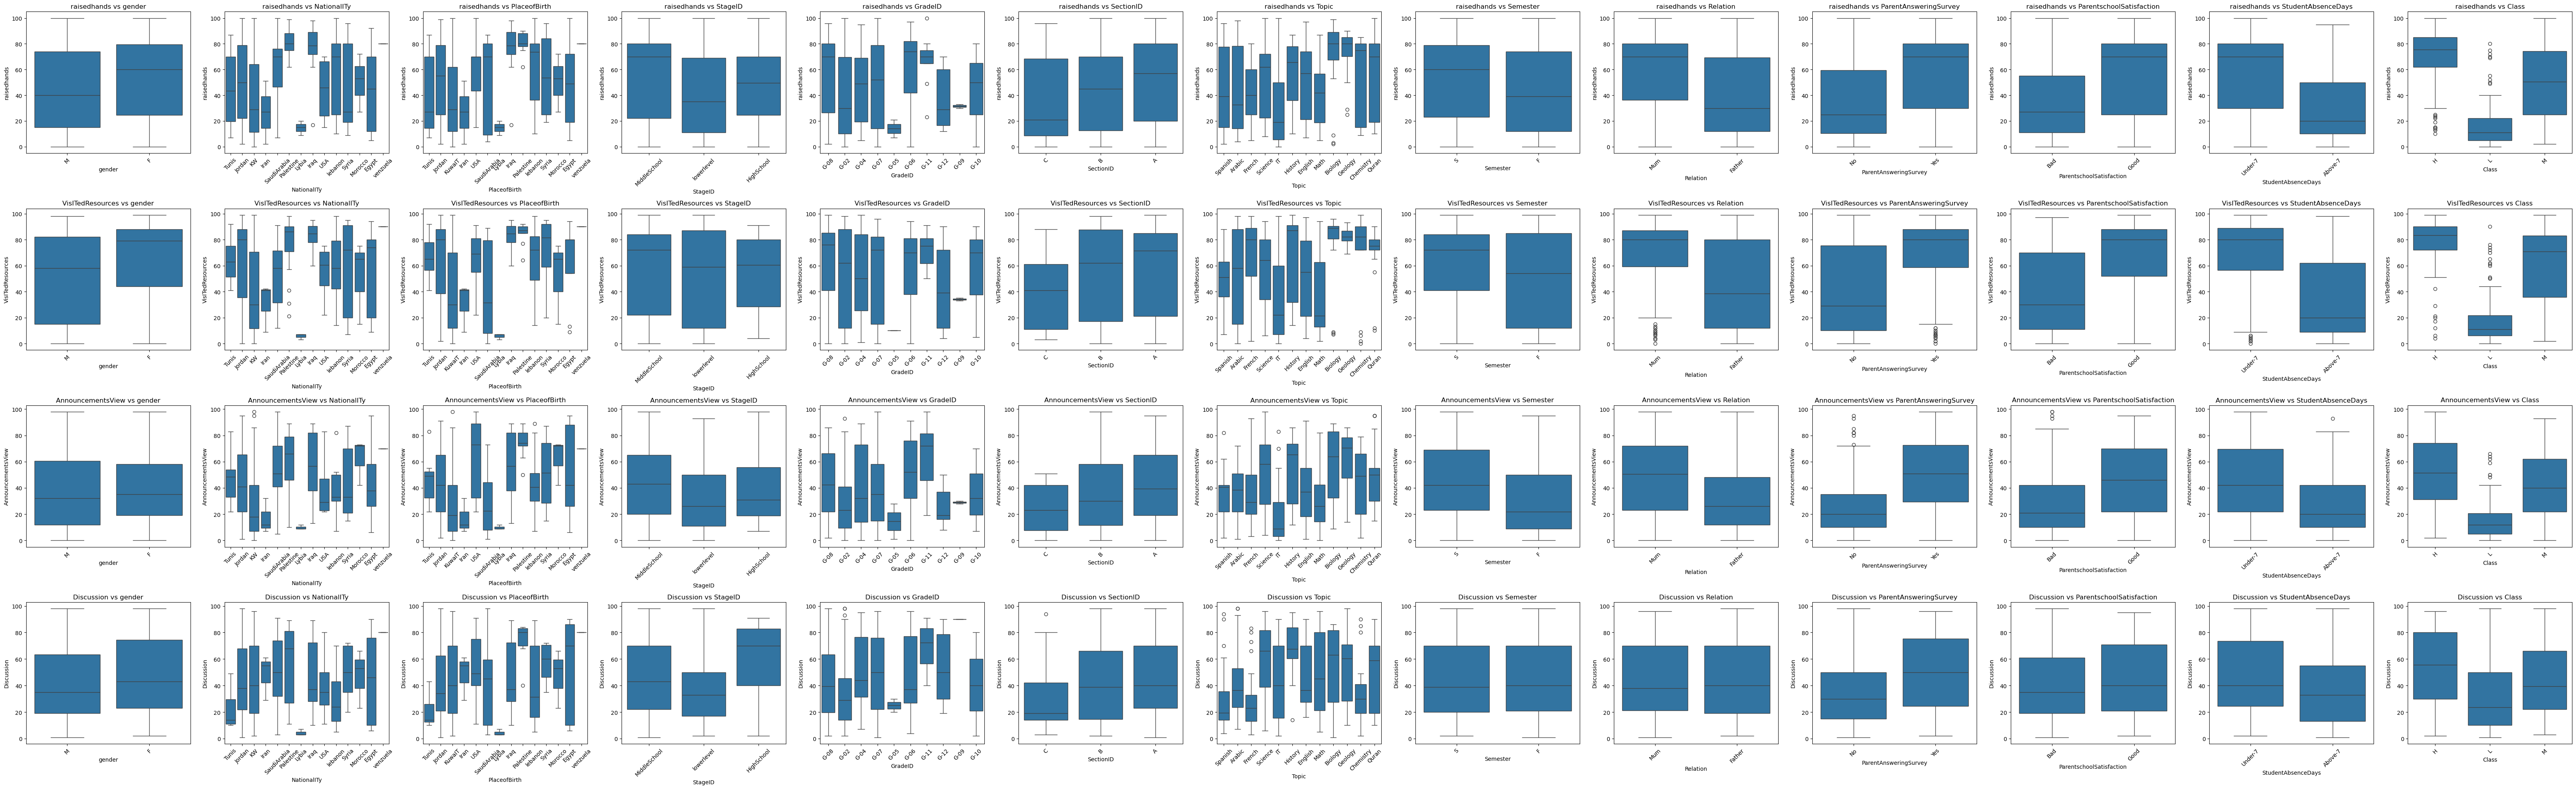

In [32]:
n_cont = len(num_col)  # Number of numerical columns
n_cat = len(cat_col)  # Number of categorical variables

# Create subplots with n_cont rows and n_cat columns
fig, axes = plt.subplots(nrows=n_cont, ncols=n_cat, figsize=(5 * n_cat, 5 * n_cont), sharex=False, sharey=False)

# Loop through each numerical column and each categorical variable to create box plots
for i, cont_col in enumerate(num_col):
    for j, cat_var in enumerate(cat_col):
        sns.boxplot(x=train_set[cat_var], y=train_set[cont_col], ax=axes[i, j])
        axes[i, j].set_title(f'{cont_col} vs {cat_var}')
        axes[i, j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

<u>Correlation Matrix for Continuous Variables</u>

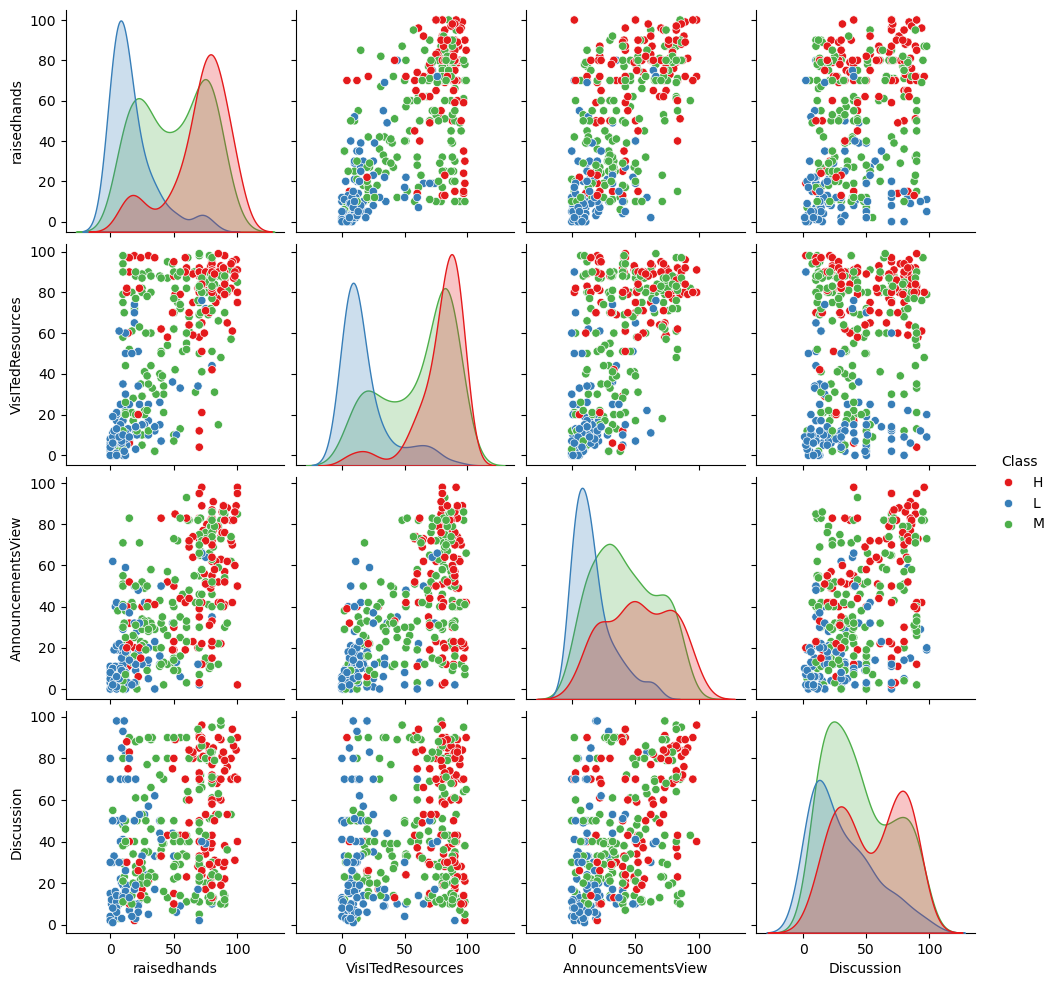

In [33]:
# Ensure your 'Class' column is treated as a categorical variable
train_set['Class'] = train_set['Class'].astype('category')

# Use pairplot to plot scatter plots for quantitative variables colored by the target variable 'Class'
sns.pairplot(train_set, hue='Class', vars=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], palette="Set1", diag_kind='kde')

plt.show()

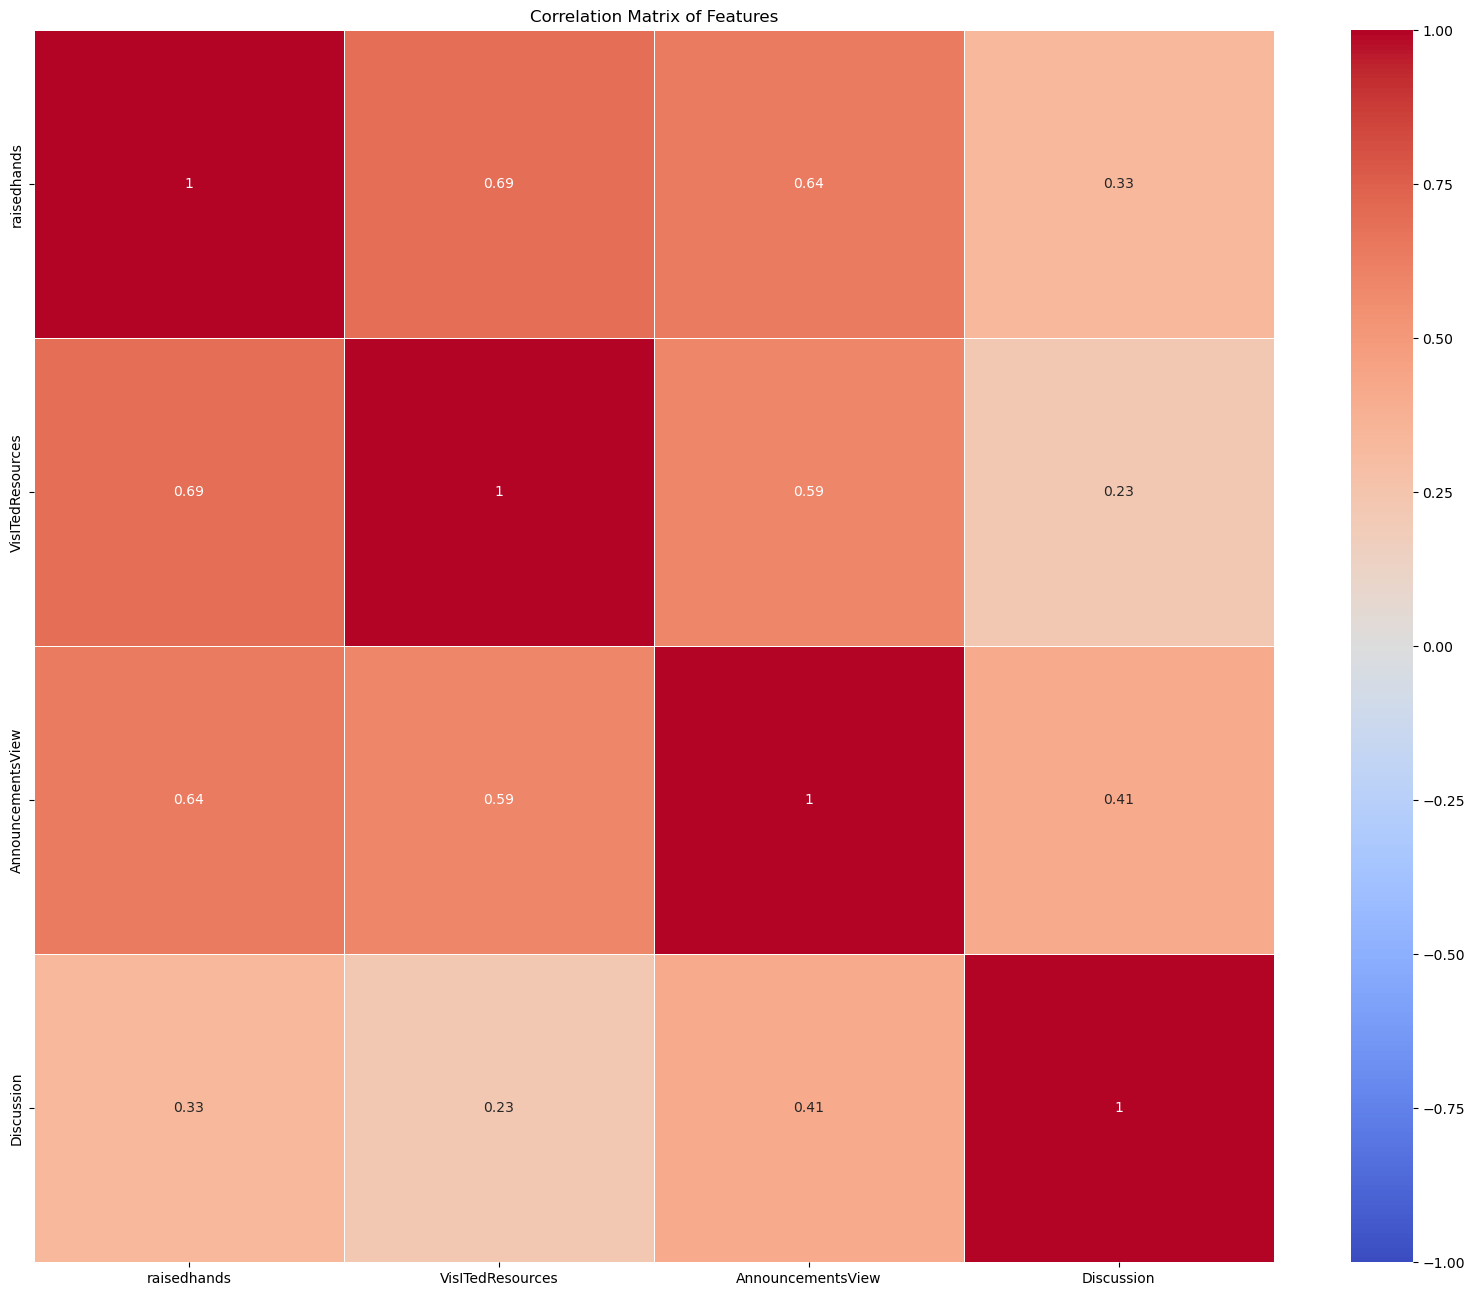

                   raisedhands  VisITedResources  AnnouncementsView  Discussion
raisedhands           1.000000          0.694959           0.636405    0.328482
VisITedResources      0.694959          1.000000           0.588183    0.225056
AnnouncementsView     0.636405          0.588183           1.000000    0.410149
Discussion            0.328482          0.225056           0.410149    1.000000


In [34]:
# Compute the correlation matrix
correlation_matrix = train_set[num_col].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Features')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

# <u>4.0 Feature Engineering</u>

<u>Display categorical variables in training set</u>

In [35]:
categorical = [col for col in train_set.columns if train_set[col].dtypes == 'O']

categorical

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

<u>Display categorical variables in training set</u>

In [36]:
numerical = [col for col in train_set.columns if train_set[col].dtypes != 'O']

numerical

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'Class']

<u>Missing values in categorical variables</u>

In [37]:
train_set[categorical].isnull().mean()

gender                      0.0
NationalITy                 0.0
PlaceofBirth                0.0
StageID                     0.0
GradeID                     0.0
SectionID                   0.0
Topic                       0.0
Semester                    0.0
Relation                    0.0
ParentAnsweringSurvey       0.0
ParentschoolSatisfaction    0.0
StudentAbsenceDays          0.0
dtype: float64

<u>Missing numerical values in variables</u>

In [38]:
train_set[numerical].isnull().mean()

raisedhands          0.0
VisITedResources     0.0
AnnouncementsView    0.0
Discussion           0.0
Class                0.0
dtype: float64

# <u>5.0 Model Selection</u>

## <u>Random Forest(All Features)</u>

In [39]:
# Define columns
num_col = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
cat_col = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Define ColumnTransformer to include both numerical and categorical columns
preprocessingss = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_col),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col)               # Pass through categorical columns (already encoded)
    ]
)

preprocessingmm = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_col),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col)               # Pass through categorical columns (already encoded)
    ]
)

# Prepare features and target variable
X = train_set.drop("Class", axis=1)  # Drop the target column 'Class'
y = train_set["Class"].copy()  # Target variable

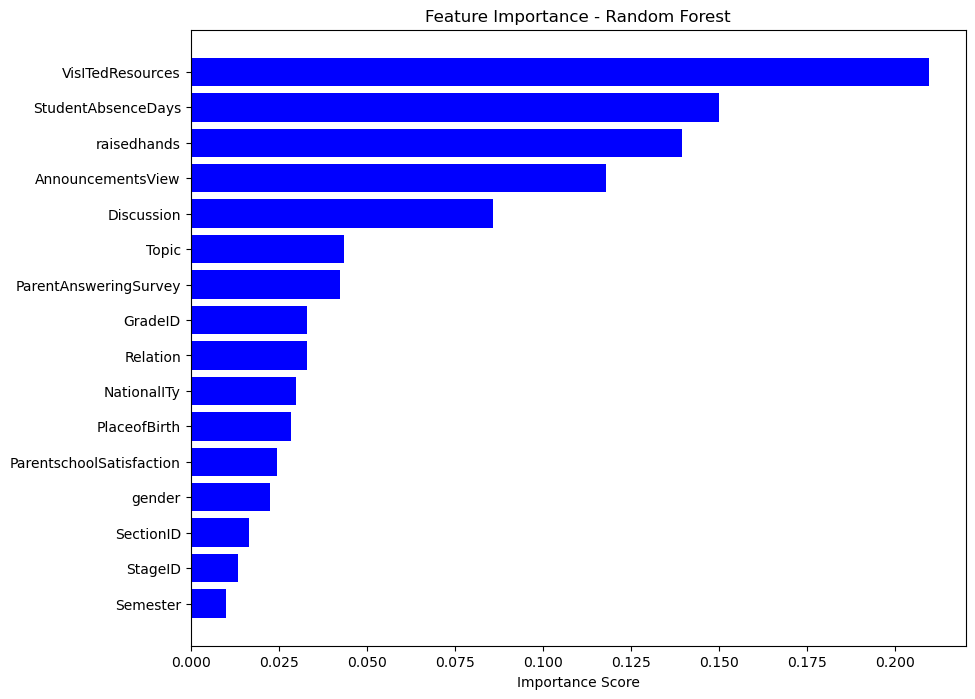

                     Feature  Importance
1           VisITedResources    0.209477
15        StudentAbsenceDays    0.149973
0                raisedhands    0.139360
2          AnnouncementsView    0.117910
3                 Discussion    0.085900
10                     Topic    0.043623
13     ParentAnsweringSurvey    0.042347
8                    GradeID    0.033077
12                  Relation    0.032991
5                NationalITy    0.029834
6               PlaceofBirth    0.028446
14  ParentschoolSatisfaction    0.024507
4                     gender    0.022409
9                  SectionID    0.016616
7                    StageID    0.013433
11                  Semester    0.010097


In [40]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfmm = make_pipeline(preprocessingmm, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfmm.fit(X, y)

# Get feature importance scores from the Random Forest model
importances = rfmm.named_steps['randomforestclassifier'].feature_importances_

# Get the feature names after transformation
# For categorical features, since we use ordinal encoding, we can use the original feature names
num_features = num_col  # Your numerical features remain the same
cat_features = cat_col  # Categorical feature names remain the same

# Combine numerical and categorical feature names
feature_names = num_features + cat_features

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the sorted feature importance
print(feature_importance_df)

In [41]:
# Collecting features with importance above a threshold
feat_list = [(name, imp) for name, imp in zip(feature_names, importances)]
total_importance = sum(imp for name, imp in feat_list)

included_feats = [name for name, imp in feat_list if imp > 0.03]

print('\nCumulative Importance =', total_importance)

# Create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns=['FEATURE', 'IMPORTANCE']).\
                      sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
print(df_imp)


Cumulative Importance = 0.9999999999999998
                     FEATURE  IMPORTANCE    CUMSUM
1           VisITedResources    0.209477  0.209477
15        StudentAbsenceDays    0.149973  0.359451
0                raisedhands    0.139360  0.498810
2          AnnouncementsView    0.117910  0.616720
3                 Discussion    0.085900  0.702620
10                     Topic    0.043623  0.746244
13     ParentAnsweringSurvey    0.042347  0.788590
8                    GradeID    0.033077  0.821667
12                  Relation    0.032991  0.854658
5                NationalITy    0.029834  0.884492
6               PlaceofBirth    0.028446  0.912938
14  ParentschoolSatisfaction    0.024507  0.937444
4                     gender    0.022409  0.959854
9                  SectionID    0.016616  0.976470
7                    StageID    0.013433  0.989903
11                  Semester    0.010097  1.000000


In [42]:
print('Most Important Features:')
print(included_feats)
print('Number of Included Features =', len(included_feats))

Most Important Features:
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'GradeID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'StudentAbsenceDays']
Number of Included Features = 9


In [43]:
from sklearn.dummy import DummyClassifier

# Define your scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'roc_auc_ovr': 'roc_auc_ovr',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

dummy_clf = DummyClassifier()
rfmm_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfmm_scores = cross_validate(rfmm, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.74358974 0.74358974 0.76315789 0.84210526 0.81578947 0.92105263
 0.63157895 0.76315789 0.76315789 0.81578947]
ROC AUC OVR scores: [0.8775772  0.87745108 0.90634402 0.93079193 0.91947212 0.97551264
 0.8862117  0.9187389  0.89374029 0.93362228]
F1 Macro Scores: [0.74056353 0.75       0.76507937 0.84085213 0.82596575 0.9244

In [44]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfss = make_pipeline(preprocessingss, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfss.fit(X, y)

# Define your scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'roc_auc_ovr': 'roc_auc_ovr',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

dummy_clf = DummyClassifier()
rfss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfss_scores = cross_validate(rfss, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.74358974 0.74358974 0.76315789 0.84210526 0.81578947 0.92105263
 0.63157895 0.76315789 0.76315789 0.81578947]
ROC AUC OVR scores: [0.8775772  0.87745108 0.90634402 0.93079193 0.91947212 0.97551264
 0.8862117  0.9187389  0.89374029 0.93362228]
F1 Macro Scores: [0.74056353 0.75       0.76507937 0.84085213 0.82596575 0.9244

## <u>KNN</u>

In [45]:
# Define ColumnTransformer to include both numerical and categorical columns
preprocessingss = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_col),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col)               # Pass through categorical columns (already encoded)
    ]
)

preprocessingmm = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_col),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col)               # Pass through categorical columns (already encoded)
    ]
)

# Prepare features and target variable
X = train_set.drop("Class", axis=1)  # Drop the target column 'Class'
y = train_set["Class"].copy()  # Target variable

In [46]:
knnmm = make_pipeline(preprocessingmm, KNeighborsClassifier(n_neighbors=3))
knnmm.fit(X, y)

# Define the dummy classifier
dummy_clf = DummyClassifier()

# Perform cross-validation
knnmm_dummy_scores = cross_validate(dummy_clf,
                                    X, y,
                                    scoring=scoring,
                                    cv=10,
                                    return_train_score=False)

knnmm_scores = cross_validate(knnmm,
                              X, y,
                              scoring=scoring,
                              cv=10,
                              return_train_score=False)

print("K-Nearest Neighbor Dummy Score:")
print("Accuracy scores:", knnmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", knnmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", knnmm_dummy_scores['test_f1_macro'])
print("Precision Macro scores:", knnmm_dummy_scores['test_precision_macro'])
print("Recall Macro scores:", knnmm_dummy_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Score:")
print("Accuracy scores:", knnmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", knnmm_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", knnmm_scores['test_f1_macro'])
print("Precision Macro scores:", knnmm_scores['test_precision_macro'])
print("Recall Macro scores:", knnmm_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Mean Score:")
print("Mean Accuracy scores:", np.mean(knnmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(knnmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(knnmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(knnmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(knnmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

K-Nearest Neighbor Dummy Score:
Accuracy scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

K-Nearest Neighbor Score:
Accuracy scores: [0.43589744 0.61538462 0.52631579 0.55263158 0.52631579 0.84210526
 0.47368421 0.63157895 0.63157895 0.57894737]
ROC AUC OVR scores: [0.68957145 0.79687186 0.7104106  0.70985933 0.73238459 0.92593067
 0.67433435 0.78952783 0.74013417 0.73559531]
F1 Macro scores: [0.44674818 0.6221603  0.5354619  0.55217236 0.55810983 0.85490196
 

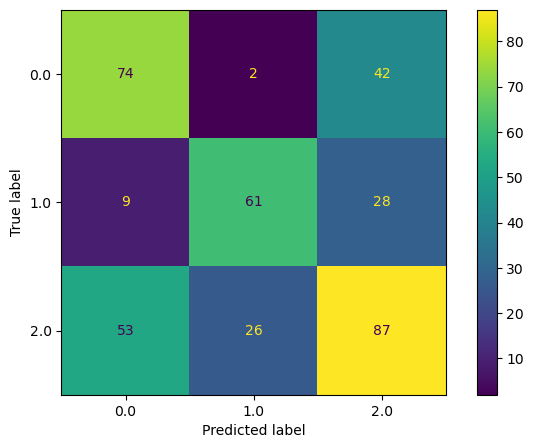

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 5))
knnmm_train_pred = cross_val_predict(knnmm, X, y, cv=10)
knnmm_train_pred
knnmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, knnmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
knnmm_cm.plot(ax=ax)            
plt.show();

In [48]:
knnss = make_pipeline(preprocessingss, KNeighborsClassifier(n_neighbors=3))
knnss.fit(X, y)

knnss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

knnss_scores = cross_validate(knnss, 
                            X, y,
                            scoring=scoring,
                            cv=10,
                            return_train_score=False)

print("K-Nearest Neighbor Dummy Score:")
print("Accuracy scores:", knnss_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", knnss_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", knnss_dummy_scores['test_f1_macro'])
print("Precision Macro scores:", knnss_dummy_scores['test_precision_macro'])
print("Recall Macro scores:", knnss_dummy_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Score:")
print("Accuracy scores:", knnss_scores['test_accuracy'])
print("ROC AUC OVR scores:", knnss_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", knnss_scores['test_f1_macro'])
print("Precision Macro scores:", knnss_scores['test_precision_macro'])
print("Recall Macro scores:", knnss_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Mean Score:")
print("Mean Accuracy scores:", np.mean(knnss_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(knnss_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(knnss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(knnss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(knnss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

K-Nearest Neighbor Dummy Score:
Accuracy scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

K-Nearest Neighbor Score:
Accuracy scores: [0.51282051 0.58974359 0.68421053 0.60526316 0.60526316 0.89473684
 0.57894737 0.65789474 0.65789474 0.65789474]
ROC AUC OVR scores: [0.72079904 0.72979601 0.83562752 0.76770046 0.76026334 0.9702997
 0.77769245 0.79021673 0.80330225 0.78145847]
F1 Macro scores: [0.52209596 0.6031746  0.69904762 0.61527778 0.62751323 0.89366786
 0

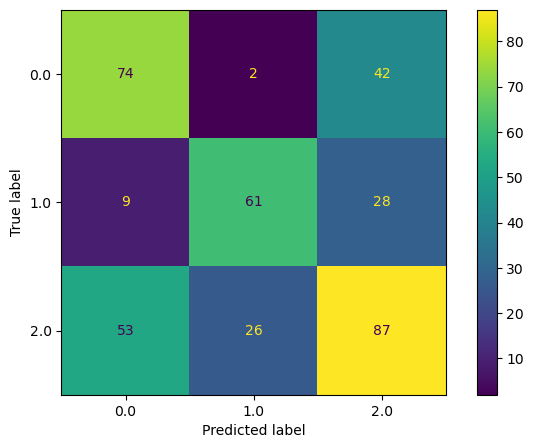

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
knnss_train_pred = cross_val_predict(knnmm, X, y, cv=10)
knnss_cm = ConfusionMatrixDisplay(confusion_matrix(y, knnss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
knnss_cm.plot(ax=ax)            
plt.show();

## <u>LinearSVC</u>

In [50]:
linearsvmmm = make_pipeline(preprocessingmm, LinearSVC(random_state=42))
linearsvmmm.fit(X, y)

scoringSVC = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

linearsvmmm_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

linearsvmmm_scores = cross_validate(linearsvmmm, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

print("Linear SVC Dummy Score:")
print("Accuracy Scores:", linearsvmmm_dummy_scores['test_accuracy'])
print("F1 Macro Scores:", linearsvmmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", linearsvmmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", linearsvmmm_dummy_scores['test_recall_macro'])

print("\nLinear SVC Score:")
print("Accuracy Scores:", linearsvmmm_scores['test_accuracy'])
print("F1 Macro Scores:", linearsvmmm_scores['test_f1_macro'])
print("Precision Macro Scores:", linearsvmmm_scores['test_precision_macro'])
print("Recall Macro Scores:", linearsvmmm_scores['test_recall_macro'])

print("\nLinear SVC Mean Score:")
print("Mean Accuracy scores:", np.mean(linearsvmmm_scores['test_accuracy']))
print("Mean F1 Macro scores:", np.mean(linearsvmmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(linearsvmmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(linearsvmmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Linear SVC Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Linear SVC Score:
Accuracy Scores: [0.56410256 0.66666667 0.78947368 0.68421053 0.65789474 0.76315789
 0.65789474 0.68421053 0.76315789 0.89473684]
F1 Macro Scores: [0.55957672 0.67828587 0.7973262  0.6886646  0.6771664  0.78385093
 0.6590464  0.70292398 0.76399287 0.89722222]
Precision Macro Scores: [0.58888889 0.67099567 0.7973262  0.67863248 0.66944444 0.78619529
 0.66114082 0.71058201 0.77407407 0.89722222]
Recall Macro Scores: [0.58758

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

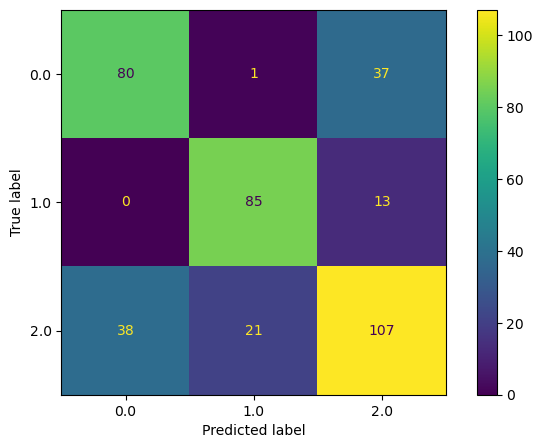

In [51]:
fig, ax = plt.subplots(figsize=(8, 5))
linearsvmmm_train_pred = cross_val_predict(linearsvmmm, X, y, cv=10)
linearsvmmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, linearsvmmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
linearsvmmm_cm.plot(ax=ax)
plt.show();

In [52]:
linearsvmss = make_pipeline(preprocessingss, LinearSVC(random_state=42))
linearsvmss.fit(X, y)

linearsvmss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

linearsvmss_scores = cross_validate(linearsvmss, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

print("Linear SVC Dummy Score:")
print("Accuracy Scores:", linearsvmss_dummy_scores['test_accuracy'])
print("F1 Macro Scores:", linearsvmss_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", linearsvmss_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", linearsvmss_dummy_scores['test_recall_macro'])

print("\nLinear SVC Score:")
print("Accuracy Scores:", linearsvmss_scores['test_accuracy'])
print("F1 Macro Scores:", linearsvmss_scores['test_f1_macro'])
print("Precision Macro Scores:", linearsvmss_scores['test_precision_macro'])
print("Recall Macro Scores:", linearsvmss_scores['test_recall_macro'])

print("\nLinear SVC Mean Score:")
print("Mean Accuracy scores:", np.mean(linearsvmss_scores['test_accuracy']))
print("Mean F1 Macro scores:", np.mean(linearsvmss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(linearsvmss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(linearsvmss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

Linear SVC Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Linear SVC Score:
Accuracy Scores: [0.56410256 0.66666667 0.76315789 0.65789474 0.65789474 0.76315789
 0.65789474 0.60526316 0.76315789 0.86842105]
F1 Macro Scores: [0.57178306 0.67828587 0.7743083  0.65854194 0.6771664  0.78385093
 0.66415496 0.62171137 0.76203277 0.87268336]
Precision Macro Scores: [0.57638889 0.67099567 0.77222222 0.64992877 0.66944444 0.78619529
 0.66068376 0.62495544 0.75909091 0.87754011]
Recall Macro Scores: [0.60392

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

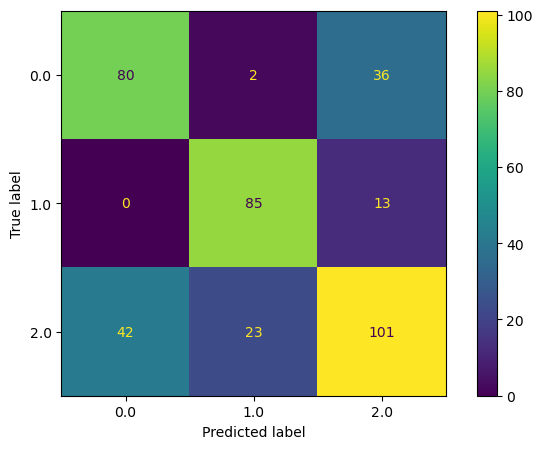

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))
linearsvmss_train_pred = cross_val_predict(linearsvmss, X, y, cv=10)
linearsvmss_cm = ConfusionMatrixDisplay(confusion_matrix(y, linearsvmss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
linearsvmss_cm.plot(ax=ax)
plt.show();

## <u>SVC</u>

In [54]:
svmmm = make_pipeline(preprocessingmm, SVC(random_state=42, probability=True))
svmmm.fit(X, y)

scoringSVC = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

svmmm_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

svmmm_scores = cross_validate(svmmm, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

print("Linear SVC Dummy Score:")
print("Accuracy Scores:", svmmm_dummy_scores['test_accuracy'])
print("F1 Macro Scores:", svmmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", svmmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", svmmm_dummy_scores['test_recall_macro'])

print("\nLinear SVC Score:")
print("Accuracy Scores:", svmmm_scores['test_accuracy'])
print("F1 Macro Scores:", svmmm_scores['test_f1_macro'])
print("Precision Macro Scores:", svmmm_scores['test_precision_macro'])
print("Recall Macro Scores:", svmmm_scores['test_recall_macro'])

print("\nLinear SVC Mean Score:")
print("Mean Accuracy scores:", np.mean(svmmm_scores['test_accuracy']))
print("Mean F1 Macro scores:", np.mean(svmmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(svmmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(svmmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Linear SVC Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Linear SVC Score:
Accuracy Scores: [0.56410256 0.58974359 0.5        0.52631579 0.63157895 0.68421053
 0.55263158 0.57894737 0.65789474 0.55263158]
F1 Macro Scores: [0.496404   0.59015152 0.38185941 0.51433128 0.63703704 0.63328157
 0.54380616 0.4957265  0.65030023 0.50525409]
Precision Macro Scores: [0.71428571 0.65169082 0.42291667 0.5        0.64374003 0.86206897
 0.62825397 0.83333333 0.74222222 0.5632716 ]
Recall Macro Scores: [0.56307

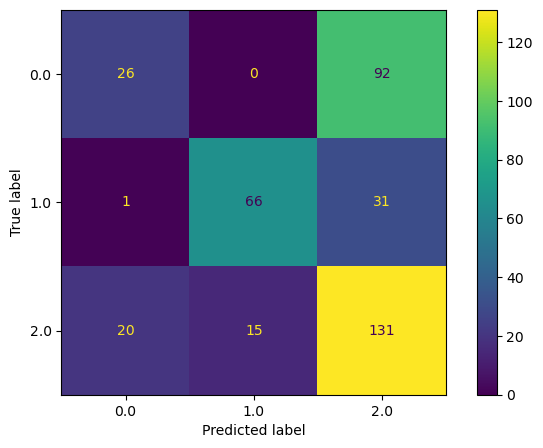

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))
svmmm_train_pred = cross_val_predict(svmmm, X, y, cv=10)
svmmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, svmmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
svmmm_cm.plot(ax=ax)
plt.show();

In [56]:
svmss = make_pipeline(preprocessingss, SVC(random_state=42, probability=True))
svmss.fit(X, y)

svmss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

svmss_scores = cross_validate(svmss, 
                            X, y,
                            scoring=scoringSVC,
                            cv=10)

print("Linear SVC Dummy Score:")
print("Accuracy Scores:", svmss_dummy_scores['test_accuracy'])
print("F1 Macro Scores:", svmss_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", svmss_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", svmss_dummy_scores['test_recall_macro'])

print("\nLinear SVC Score:")
print("Accuracy Scores:", svmss_scores['test_accuracy'])
print("F1 Macro Scores:", svmss_scores['test_f1_macro'])
print("Precision Macro Scores:", svmss_scores['test_precision_macro'])
print("Recall Macro Scores:", svmss_scores['test_recall_macro'])

print("\nLinear SVC Mean Score:")
print("Mean Accuracy scores:", np.mean(svmss_scores['test_accuracy']))
print("Mean F1 Macro scores:", np.mean(svmss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(svmss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(svmss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Linear SVC Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Linear SVC Score:
Accuracy Scores: [0.58974359 0.64102564 0.68421053 0.55263158 0.63157895 0.73684211
 0.60526316 0.63157895 0.63157895 0.57894737]
F1 Macro Scores: [0.56631579 0.6504329  0.64537685 0.54260331 0.64456328 0.74191033
 0.6104789  0.61388766 0.62323376 0.57461874]
Precision Macro Scores: [0.70793651 0.64520202 0.71212121 0.53223982 0.63850267 0.76851852
 0.64219577 0.65454545 0.64761905 0.6031746 ]
Recall Macro Scores: [0.59901

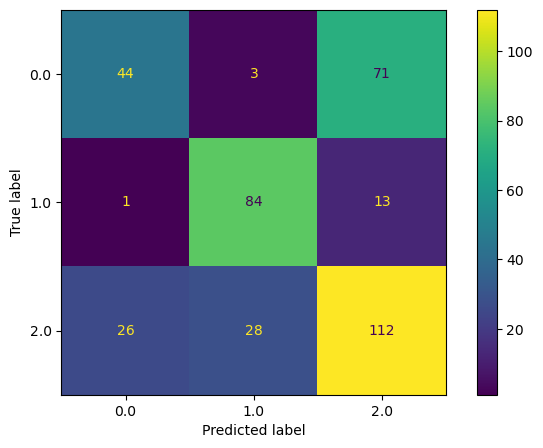

In [57]:
fig, ax = plt.subplots(figsize=(8, 5))
svmss_train_pred = cross_val_predict(svmss, X, y, cv=10)
svmss_cm = ConfusionMatrixDisplay(confusion_matrix(y, svmss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
svmss_cm.plot(ax=ax)
plt.show();

## <u>Logistic Regression</u>

In [58]:
from sklearn.linear_model import LogisticRegression

lrmm = make_pipeline(preprocessingmm, LogisticRegression(random_state=42))
lrmm.fit(X, y)

# Define the dummy classifier
dummy_clf = DummyClassifier()

# Perform cross-validation
lrmm_dummy_scores = cross_validate(dummy_clf,
                                    X, y,
                                    scoring=scoring,
                                    cv=10,
                                    return_train_score=False)

lrmm_scores = cross_validate(lrmm,
                              X, y,
                              scoring=scoring,
                              cv=10,
                              return_train_score=False)

print("K-Nearest Neighbor Dummy Score:")
print("Accuracy scores:", lrmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrmm_dummy_scores['test_f1_macro'])
print("Precision Macro scores:", lrmm_dummy_scores['test_precision_macro'])
print("Recall Macro scores:", lrmm_dummy_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Score:")
print("Accuracy scores:", lrmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrmm_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrmm_scores['test_f1_macro'])
print("Precision Macro scores:", lrmm_scores['test_precision_macro'])
print("Recall Macro scores:", lrmm_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Mean Score:")
print("Mean Accuracy scores:", np.mean(lrmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(lrmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(lrmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(lrmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(lrmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

K-Nearest Neighbor Dummy Score:
Accuracy scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

K-Nearest Neighbor Score:
Accuracy scores: [0.64102564 0.74358974 0.84210526 0.73684211 0.76315789 0.68421053
 0.65789474 0.73684211 0.76315789 0.78947368]
ROC AUC OVR scores: [0.82655558 0.87421678 0.90702001 0.88844561 0.8726743  0.91057962
 0.80595585 0.89558775 0.90475982 0.93883131]
F1 Macro scores: [0.63888889 0.75079365 0.84723708 0.73363965 0.77367115 0.70986076
 

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

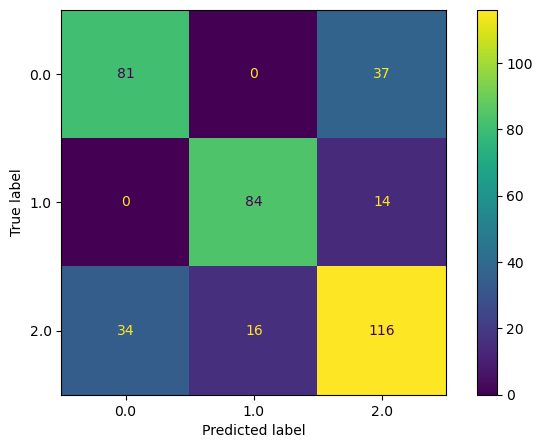

In [59]:
fig, ax = plt.subplots(figsize=(8, 5))
lrmm_train_pred = cross_val_predict(lrmm, X, y, cv=10)
lrmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, lrmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
lrmm_cm.plot(ax=ax)
plt.show();

In [60]:
lrss = make_pipeline(preprocessingss, LogisticRegression(random_state=42))
lrss.fit(X, y)

# Define the dummy classifier
dummy_clf = DummyClassifier()

# Perform cross-validation
lrss_dummy_scores = cross_validate(dummy_clf,
                                    X, y,
                                    scoring=scoring,
                                    cv=10,
                                    return_train_score=False)

lrss_scores = cross_validate(lrss,
                              X, y,
                              scoring=scoring,
                              cv=10,
                              return_train_score=False)

print("K-Nearest Neighbor Dummy Score:")
print("Accuracy scores:", lrss_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrss_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrss_dummy_scores['test_f1_macro'])
print("Precision Macro scores:", lrss_dummy_scores['test_precision_macro'])
print("Recall Macro scores:", lrss_dummy_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Score:")
print("Accuracy scores:", lrss_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrss_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrss_scores['test_f1_macro'])
print("Precision Macro scores:", lrss_scores['test_precision_macro'])
print("Recall Macro scores:", lrss_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Mean Score:")
print("Mean Accuracy scores:", np.mean(lrss_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(lrss_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(lrss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(lrss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(lrss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

K-Nearest Neighbor Dummy Score:
Accuracy scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

K-Nearest Neighbor Score:
Accuracy scores: [0.64102564 0.71794872 0.84210526 0.71052632 0.76315789 0.68421053
 0.65789474 0.73684211 0.76315789 0.81578947]
ROC AUC OVR scores: [0.83991531 0.85760308 0.90146069 0.89311415 0.87875464 0.90270595
 0.8103244  0.88752567 0.89798327 0.93977897]
F1 Macro scores: [0.63888889 0.72718659 0.84723708 0.70704033 0.77367115 0.70986076
 

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

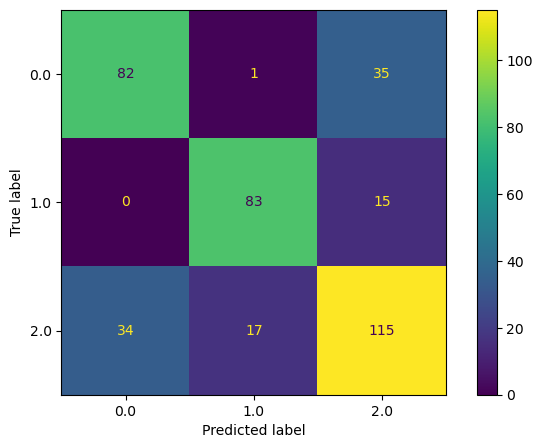

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
lrss_train_pred = cross_val_predict(lrss, X, y, cv=10)
lrss_cm = ConfusionMatrixDisplay(confusion_matrix(y, lrss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
lrss_cm.plot(ax=ax)
plt.show();

## <u>Logistic Regression CV</u>

In [62]:
from sklearn.linear_model import LogisticRegressionCV

lrCVmm = make_pipeline(preprocessingmm, LogisticRegressionCV(random_state=42))
lrCVmm.fit(X, y)

# Define the dummy classifier
dummy_clf = DummyClassifier()

# Perform cross-validation
lrCVmm_dummy_scores = cross_validate(dummy_clf,
                                    X, y,
                                    scoring=scoring,
                                    cv=10,
                                    return_train_score=False)

lrCVmm_scores = cross_validate(lrCVmm,
                              X, y,
                              scoring=scoring,
                              cv=10,
                              return_train_score=False)

print("K-Nearest Neighbor Dummy Score:")
print("Accuracy scores:", lrCVmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrCVmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrCVmm_dummy_scores['test_f1_macro'])
print("Precision Macro scores:", lrCVmm_dummy_scores['test_precision_macro'])
print("Recall Macro scores:", lrCVmm_dummy_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Score:")
print("Accuracy scores:", lrCVmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrCVmm_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrCVmm_scores['test_f1_macro'])
print("Precision Macro scores:", lrCVmm_scores['test_precision_macro'])
print("Recall Macro scores:", lrCVmm_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Mean Score:")
print("Mean Accuracy scores:", np.mean(lrCVmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(lrCVmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(lrCVmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(lrCVmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(lrCVmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

K-Nearest Neighbor Dummy Score:
Accuracy scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

K-Nearest Neighbor Score:
Accuracy scores: [0.66666667 0.76923077 0.84210526 0.71052632 0.76315789 0.68421053
 0.68421053 0.73684211 0.68421053 0.81578947]
ROC AUC OVR scores: [0.82885443 0.87025601 0.90290793 0.90320573 0.87968835 0.9044387
 0.81294955 0.88633589 0.89422175 0.9385878 ]
F1 Macro scores: [0.67005013 0.77916566 0.84723708 0.70704033 0.77367115 0.70986076
 0

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

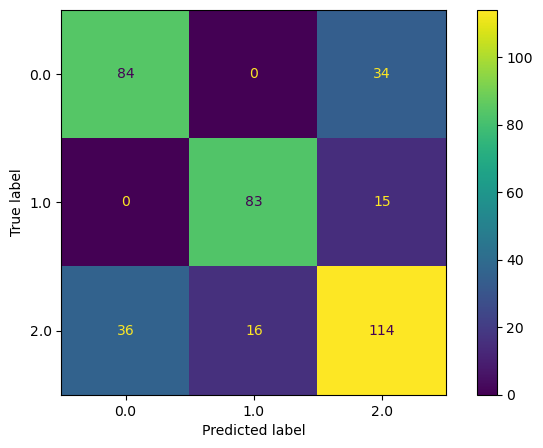

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
lrCVmm_train_pred = cross_val_predict(lrCVmm, X, y, cv=10)
lrCVmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, lrCVmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
lrCVmm_cm.plot(ax=ax)
plt.show();

In [64]:
lrCVss = make_pipeline(preprocessingss, LogisticRegressionCV(random_state=42))
lrCVss.fit(X, y)

# Define the dummy classifier
dummy_clf = DummyClassifier()

# Perform cross-validation
lrCVss_dummy_scores = cross_validate(dummy_clf,
                                    X, y,
                                    scoring=scoring,
                                    cv=10,
                                    return_train_score=False)

lrCVss_scores = cross_validate(lrCVss,
                              X, y,
                              scoring=scoring,
                              cv=10,
                              return_train_score=False)

print("K-Nearest Neighbor Dummy Score:")
print("Accuracy scores:", lrCVss_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrCVss_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrCVss_dummy_scores['test_f1_macro'])
print("Precision Macro scores:", lrCVss_dummy_scores['test_precision_macro'])
print("Recall Macro scores:", lrCVss_dummy_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Score:")
print("Accuracy scores:", lrCVss_scores['test_accuracy'])
print("ROC AUC OVR scores:", lrCVss_scores['test_roc_auc_ovr'])
print("F1 Macro scores:", lrCVss_scores['test_f1_macro'])
print("Precision Macro scores:", lrCVss_scores['test_precision_macro'])
print("Recall Macro scores:", lrCVss_scores['test_recall_macro'])

print("\nK-Nearest Neighbor Mean Score:")
print("Mean Accuracy scores:", np.mean(lrCVss_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(lrCVss_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(lrCVss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(lrCVss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(lrCVss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

K-Nearest Neighbor Dummy Score:
Accuracy scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

K-Nearest Neighbor Score:
Accuracy scores: [0.66666667 0.76923077 0.84210526 0.71052632 0.76315789 0.68421053
 0.65789474 0.73684211 0.73684211 0.81578947]
ROC AUC OVR scores: [0.84246848 0.86807778 0.90451858 0.88751191 0.88155576 0.90257128
 0.81933275 0.88740496 0.89242285 0.94179362]
F1 Macro scores: [0.67005013 0.77916566 0.84723708 0.70704033 0.77367115 0.70986076
 

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

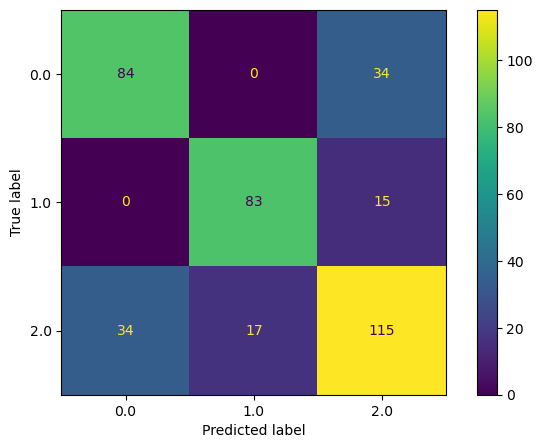

In [65]:
fig, ax = plt.subplots(figsize=(8, 5))
lrCVss_train_pred = cross_val_predict(lrCVss, X, y, cv=10)
lrCVss_cm = ConfusionMatrixDisplay(confusion_matrix(y, lrCVss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
lrCVss_cm.plot(ax=ax)
plt.show();

## <u>Decision Tree</u>

In [66]:
dtmm = make_pipeline(preprocessingmm, DecisionTreeClassifier(random_state=42))
dtmm.fit(X, y)

dummy_clf = DummyClassifier()
dtmm_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

dtmm_scores = cross_validate(dtmm, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Decision Tree Classifier Dummy Score:")
print("Accuracy Scores:", dtmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", dtmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", dtmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", dtmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", dtmm_dummy_scores['test_recall_macro'])

print("\nDecision Tree Classifier Score:")
print("Accuracy Scores:", dtmm_scores['test_accuracy'])
print("ROC AUC OVR scores:",dtmm_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", dtmm_scores['test_f1_macro'])
print("Precision Macro Scores:", dtmm_scores['test_precision_macro'])
print("Recall Macro Scores:", dtmm_scores['test_recall_macro'])

print("\nDecision Tree Classifier Score:")
print("Mean Accuracy scores:", np.mean(dtmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(dtmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(dtmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(dtmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(dtmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Decision Tree Classifier Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Decision Tree Classifier Score:
Accuracy Scores: [0.58974359 0.66666667 0.71052632 0.71052632 0.68421053 0.73684211
 0.60526316 0.71052632 0.63157895 0.71052632]
ROC AUC OVR scores: [0.69831889 0.74643306 0.79112436 0.79691287 0.78462971 0.79822109
 0.71558788 0.76391317 0.70321276 0.7847576 ]
F1 Macro Scores: [0.60382102 0.66666667 0.70949793 0.71505376 0.70899471 

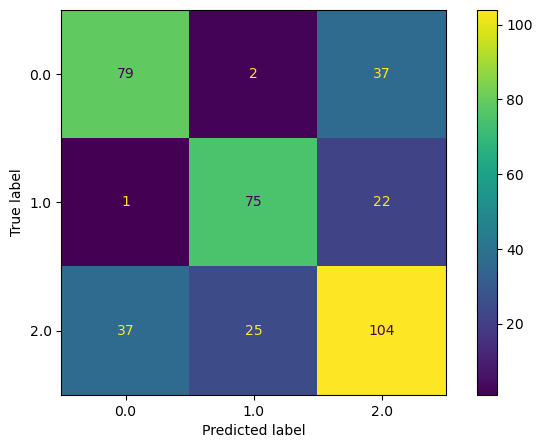

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))
dtmm_train_pred = cross_val_predict(dtmm, X, y, cv=10)
dtmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, dtmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
dtmm_cm.plot(ax=ax)
plt.show();

In [68]:
dtss = make_pipeline(preprocessingss, DecisionTreeClassifier(random_state=42))
dtss.fit(X, y)

dummy_clf = DummyClassifier()
dtss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

dtss_scores = cross_validate(dtss, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Decision Tree Classifier Dummy Score:")
print("Accuracy Scores:", dtss_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", dtss_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", dtss_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", dtss_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", dtss_dummy_scores['test_recall_macro'])

print("\nDecision Tree Classifier Score:")
print("Accuracy Scores:", dtss_scores['test_accuracy'])
print("ROC AUC OVR scores:",dtss_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", dtss_scores['test_f1_macro'])
print("Precision Macro Scores:", dtss_scores['test_precision_macro'])
print("Recall Macro Scores:", dtss_scores['test_recall_macro'])

print("\nDecision Tree Classifier Score:")
print("Mean Accuracy scores:", np.mean(dtss_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(dtss_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(dtss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(dtss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(dtss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Decision Tree Classifier Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Decision Tree Classifier Score:
Accuracy Scores: [0.58974359 0.66666667 0.71052632 0.71052632 0.68421053 0.73684211
 0.60526316 0.71052632 0.63157895 0.71052632]
ROC AUC OVR scores: [0.69831889 0.74643306 0.79112436 0.79691287 0.78462971 0.79822109
 0.71558788 0.76391317 0.70321276 0.7847576 ]
F1 Macro Scores: [0.60382102 0.66666667 0.70949793 0.71505376 0.70899471 

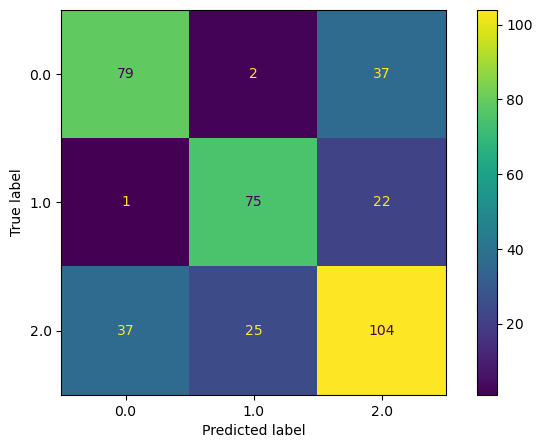

In [69]:
fig, ax = plt.subplots(figsize=(8, 5))
dtss_train_pred = cross_val_predict(dtss, X, y, cv=10)
dtss_cm = ConfusionMatrixDisplay(confusion_matrix(y, dtss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
dtss_cm.plot(ax=ax)
plt.show();

## <u>Naive Bayes</u>

In [70]:
gnbmm = make_pipeline(preprocessingmm, GaussianNB())
gnbmm.fit(X, y)

dummy_clf = DummyClassifier()
gnbmm_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

gnbmm_scores = cross_validate(gnbmm, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Naive Bayes Dummy Score:")
print("Accuracy Scores:", gnbmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", gnbmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", gnbmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", gnbmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", gnbmm_dummy_scores['test_recall_macro'])

print("\nNaive Bayes Score:")
print("Accuracy Scores:", gnbmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", gnbmm_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", gnbmm_scores['test_f1_macro'])
print("Precision Macro Scores:", gnbmm_scores['test_precision_macro'])
print("Recall Macro Scores:", gnbmm_scores['test_recall_macro'])

print("\nNaive Bayes Mean Score:")
print("Mean Accuracy scores:", np.mean(gnbmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(gnbmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(gnbmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(gnbmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(gnbmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Naive Bayes Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Naive Bayes Score:
Accuracy Scores: [0.66666667 0.71794872 0.73684211 0.55263158 0.73684211 0.71052632
 0.60526316 0.63157895 0.71052632 0.73684211]
ROC AUC OVR scores: [0.84008286 0.86766899 0.88112545 0.83847155 0.89170084 0.90122005
 0.79432304 0.85124806 0.8550734  0.91015582]
F1 Macro Scores: [0.67324587 0.73204275 0.74676501 0.57138647 0.74285714 0.73307791
 0.6164751  0.6

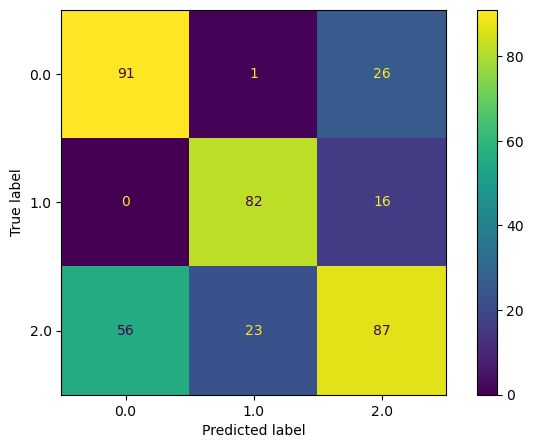

In [71]:
fig, ax = plt.subplots(figsize=(8, 5))
gnbmm_train_pred = cross_val_predict(gnbmm, X, y, cv=10)
gnbmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, gnbmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
gnbmm_cm.plot(ax=ax)
plt.show();

In [72]:
gnbss = make_pipeline(preprocessingss, GaussianNB())
gnbss.fit(X, y)

dummy_clf = DummyClassifier()
gnbss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

gnbss_scores = cross_validate(gnbss, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Naive Bayes Dummy Score:")
print("Accuracy Scores:", gnbss_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", gnbss_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", gnbss_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", gnbss_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", gnbss_dummy_scores['test_recall_macro'])

print("\nNaive Bayes Score:")
print("Accuracy Scores:", gnbss_scores['test_accuracy'])
print("ROC AUC OVR scores:", gnbss_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", gnbss_scores['test_f1_macro'])
print("Precision Macro Scores:", gnbss_scores['test_precision_macro'])
print("Recall Macro Scores:", gnbss_scores['test_recall_macro'])

print("\nNaive Bayes Mean Score:")
print("Mean Accuracy scores:", np.mean(gnbss_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(gnbss_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(gnbss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(gnbss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(gnbss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Naive Bayes Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Naive Bayes Score:
Accuracy Scores: [0.66666667 0.71794872 0.73684211 0.55263158 0.73684211 0.71052632
 0.60526316 0.63157895 0.71052632 0.73684211]
ROC AUC OVR scores: [0.84008286 0.86766899 0.88112545 0.83847155 0.89170084 0.90122005
 0.79432304 0.85124806 0.8550734  0.91015582]
F1 Macro Scores: [0.67324587 0.73204275 0.74676501 0.57138647 0.74285714 0.73307791
 0.6164751  0.6

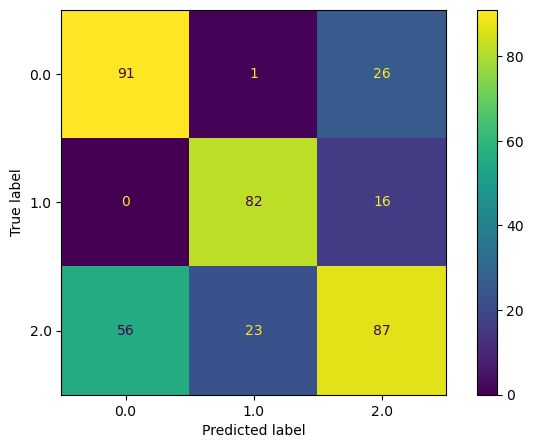

In [73]:
fig, ax = plt.subplots(figsize=(8, 5))
gnbss_train_pred = cross_val_predict(gnbss, X, y, cv=10)
gnbss_cm = ConfusionMatrixDisplay(confusion_matrix(y, gnbss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
gnbss_cm.plot(ax=ax)
plt.show();

## <u>Multi Layer Perceptron</u>

In [74]:
mlpmm= make_pipeline(preprocessingmm, MLPClassifier(random_state=42))
mlpmm.fit(X, y)

dummy_clf = DummyClassifier()
mlpmm_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

mlpmm_scores = cross_validate(mlpmm, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Multi Layer Perceptron Dummy Score:")
print("Accuracy Scores:", mlpmm_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", mlpmm_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", mlpmm_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", mlpmm_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", mlpmm_dummy_scores['test_recall_macro'])

print("\nMulti Layer Perceptron Score:")
print("Accuracy Scores:", mlpmm_scores['test_accuracy'])
print("ROC AUC OVR scores:", mlpmm_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", mlpmm_scores['test_f1_macro'])
print("Precision Macro Scores:", mlpmm_scores['test_precision_macro'])
print("Recall Macro Scores:", mlpmm_scores['test_recall_macro'])

print("\nMulti Layer Perceptron Score:")
print("Mean Accuracy scores:", np.mean(mlpmm_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(mlpmm_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(mlpmm_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(mlpmm_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(mlpmm_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is

Multi Layer Perceptron Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Multi Layer Perceptron Score:
Accuracy Scores: [0.64102564 0.79487179 0.84210526 0.71052632 0.76315789 0.78947368
 0.68421053 0.65789474 0.73684211 0.81578947]
ROC AUC OVR scores: [0.85477649 0.88637031 0.88950169 0.88638957 0.86881832 0.94154457
 0.81841492 0.84853202 0.8790737  0.91952978]
F1 Macro Scores: [0.63888889 0.7962125  0.84444444 0.6998427  0.77367115 0.79

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_netw

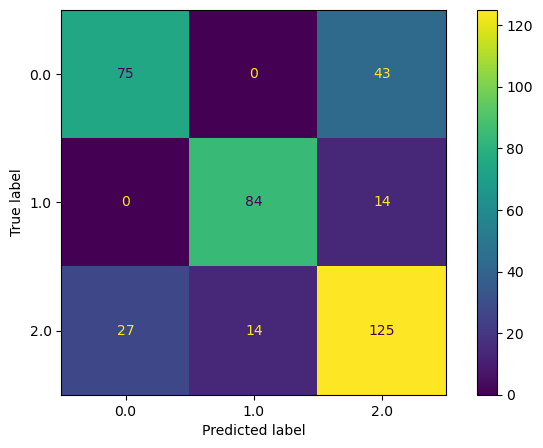

In [75]:
fig, ax = plt.subplots(figsize=(8, 5))
mlpmm_train_pred = cross_val_predict(mlpmm, X, y, cv=10)
mlpmm_cm = ConfusionMatrixDisplay(confusion_matrix(y, mlpmm_train_pred), display_labels=["0.0", "1.0", "2.0"],)
mlpmm_cm.plot(ax=ax)
plt.show();

In [76]:
mlpss = make_pipeline(preprocessingss, MLPClassifier(random_state=42))
mlpss.fit(X, y)

dummy_clf = DummyClassifier()
mlpss_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

mlpss_scores = cross_validate(mlpss, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Multi Layer Perceptron Dummy Score:")
print("Accuracy Scores:", mlpss_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", mlpss_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", mlpss_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", mlpss_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", mlpss_dummy_scores['test_recall_macro'])

print("\nMulti Layer Perceptron Score:")
print("Accuracy Scores:", mlpss_scores['test_accuracy'])
print("ROC AUC OVR scores:", mlpss_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", mlpss_scores['test_f1_macro'])
print("Precision Macro Scores:", mlpss_scores['test_precision_macro'])
print("Recall Macro Scores:", mlpss_scores['test_recall_macro'])

print("\nMulti Layer Perceptron Score:")
print("Mean Accuracy scores:", np.mean(mlpss_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(mlpss_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(mlpss_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(mlpss_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(mlpss_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is

Multi Layer Perceptron Dummy Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Multi Layer Perceptron Score:
Accuracy Scores: [0.64102564 0.76923077 0.84210526 0.68421053 0.71052632 0.73684211
 0.57894737 0.63157895 0.78947368 0.84210526]
ROC AUC OVR scores: [0.84421717 0.85861113 0.90902371 0.87155189 0.88162986 0.92251802
 0.81554557 0.86239455 0.89162574 0.92496739]
F1 Macro Scores: [0.64962121 0.7783208  0.84723708 0.68538324 0.7251462  0.74

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_netw

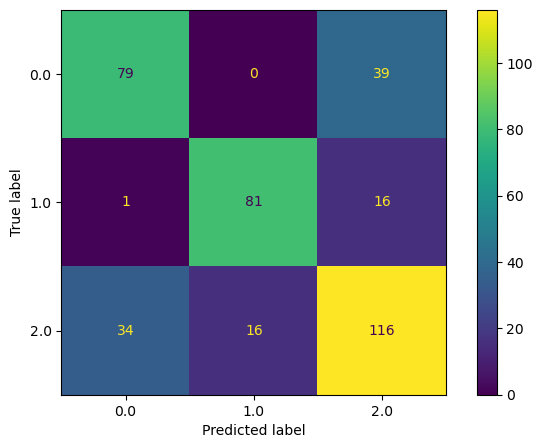

In [77]:
fig, ax = plt.subplots(figsize=(8, 5))
mlpss_train_pred = cross_val_predict(mlpss, X, y, cv=10)
mlpss_cm = ConfusionMatrixDisplay(confusion_matrix(y, mlpss_train_pred), display_labels=["0.0", "1.0", "2.0"],)
mlpss_cm.plot(ax=ax)
plt.show();

## <u>Best Classification Model</u>

In [78]:
# Define your models
models = {
    'Dummy': dummy_clf,
    'RF(Min_Max)': rfmm,
    'RF(Standard_Scaler)': rfss,
    'KNN(Min_Max)': knnmm,
    'KNN(Standard_Scaler)': knnss,
    'LinearSVC(Min_Max)': linearsvmmm,
    'LinearSVC(Standard_Scaler)': linearsvmss,
    'SVC(Min_Max)': svmmm,
    'SVC(Standard_Scaler)': svmss,
    'LogisticRegression(MinMax)': lrmm,
    'LogisticRegression(Standard_Scaler)': lrss,
    'LogisticRegressionCV(Min_Max)': lrCVmm,
    'LogisticRegressionCV(Standard_Scaler)': lrCVss,
    'DT(Min_Max)': dtmm,
    'DT(Standard_Scaler)': dtss,
    'GaussianNB(Min_Max)': gnbmm,
    'GaussianNB(Standard_Scaler)': gnbss,
    'MLP(Min_Max)': mlpmm,
    'MLP(Standard_Scaler)': mlpss,
}

# Define your scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=1),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=1),
    'f1_macro': 'f1_macro'
}

# Create an empty list to store the results
results_list = []

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_validate(model, X, y, scoring=scoring, cv=10, return_train_score=False)
    
    # Calculate mean scores for each metric
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision_macro'])
    mean_recall = np.mean(scores['test_recall_macro'])
    mean_f1 = np.mean(scores['test_f1_macro'])
    
    # Store results in the list
    results_list.append({
        'Model': model_name,
        'Accuracy': mean_accuracy,
        'Precision (Macro)': mean_precision,
        'Recall (Macro)': mean_recall,
        'F1 Score (Macro)': mean_f1
    })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list)

# Sort the DataFrame by F1 Score or any other preferred metric
results_df = results_df.sort_values(by='F1 Score (Macro)', ascending=False)

# Display the summary table
print(results_df)

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

                                    Model  Accuracy  Precision (Macro)  Recall (Macro)  F1 Score (Macro)
2                     RF(Standard_Scaler)  0.782928           0.804385        0.786243          0.787762
1                             RF(Min_Max)  0.780297           0.802668        0.783465          0.785217
17                           MLP(Min_Max)  0.743590           0.765929        0.748147          0.749578
12  LogisticRegressionCV(Standard_Scaler)  0.738327           0.755891        0.750344          0.746694
11          LogisticRegressionCV(Min_Max)  0.735695           0.753659        0.748260          0.745005
9              LogisticRegression(MinMax)  0.735830           0.754490        0.747427          0.744193
10    LogisticRegression(Standard_Scaler)  0.733266           0.751169        0.744911          0.740251
18                   MLP(Standard_Scaler)  0.722605           0.740951        0.731871          0.731552
5                      LinearSVC(Min_Max)  0.712551    

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# <u>6.0 Fine Tuning Shortlist Models</u>

## <u>Feature Selection</u>

### <u>Random Forest(Dropped Semester)</u>

In [79]:
# Define columns
num_colSemester = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
cat_colSemester = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Define ColumnTransformer to include both numerical and categorical columns
preprocessingss_Semester = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_colSemester),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_colSemester)               # Pass through categorical columns (already encoded)
    ]
)

preprocessingmm_Semester = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_colSemester),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_colSemester)               # Pass through categorical columns (already encoded)
    ]
)

# Prepare features and target variable
X = train_set.drop("Class", axis=1)  # Drop the target column 'Class'
y = train_set["Class"].copy()  # Target variable

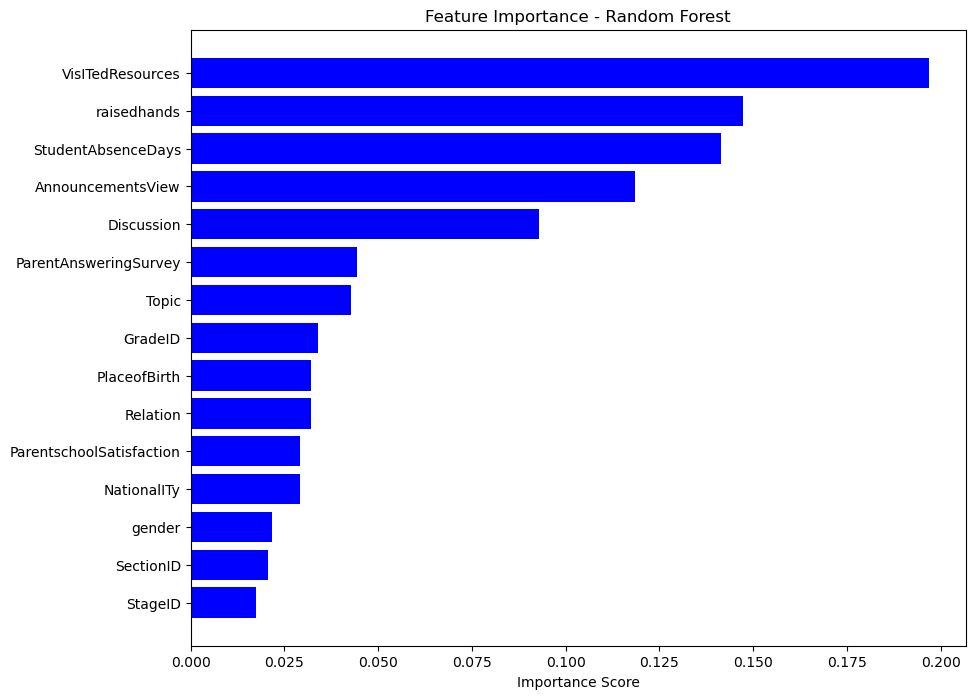

                     Feature  Importance
1           VisITedResources    0.196765
0                raisedhands    0.147259
14        StudentAbsenceDays    0.141376
2          AnnouncementsView    0.118359
3                 Discussion    0.092854
12     ParentAnsweringSurvey    0.044414
10                     Topic    0.042661
8                    GradeID    0.034069
6               PlaceofBirth    0.032130
11                  Relation    0.031989
13  ParentschoolSatisfaction    0.029287
5                NationalITy    0.029077
4                     gender    0.021714
9                  SectionID    0.020574
7                    StageID    0.017472


In [80]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfmm_Semester = make_pipeline(preprocessingmm_Semester, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfmm_Semester.fit(X, y)

# Get feature importance scores from the Random Forest model
importances = rfmm_Semester.named_steps['randomforestclassifier'].feature_importances_

# Get the feature names after transformation
# For categorical features, since we use ordinal encoding, we can use the original feature names
num_features = num_colSemester  # Your numerical features remain the same
cat_features = cat_colSemester  # Categorical feature names remain the same

# Combine numerical and categorical feature names
feature_names = num_features + cat_features

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the sorted feature importance
print(feature_importance_df)

In [81]:
# Collecting features with importance above a threshold
feat_list = [(name, imp) for name, imp in zip(feature_names, importances)]
total_importance = sum(imp for name, imp in feat_list)

included_feats = [name for name, imp in feat_list if imp > 0.03]

print('\nCumulative Importance =', total_importance)

# Create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns=['FEATURE', 'IMPORTANCE']).\
                      sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
print(df_imp)


Cumulative Importance = 1.0
                     FEATURE  IMPORTANCE    CUMSUM
1           VisITedResources    0.196765  0.196765
0                raisedhands    0.147259  0.344024
14        StudentAbsenceDays    0.141376  0.485400
2          AnnouncementsView    0.118359  0.603759
3                 Discussion    0.092854  0.696612
12     ParentAnsweringSurvey    0.044414  0.741027
10                     Topic    0.042661  0.783688
8                    GradeID    0.034069  0.817758
6               PlaceofBirth    0.032130  0.849887
11                  Relation    0.031989  0.881876
13  ParentschoolSatisfaction    0.029287  0.911163
5                NationalITy    0.029077  0.940240
4                     gender    0.021714  0.961954
9                  SectionID    0.020574  0.982528
7                    StageID    0.017472  1.000000


In [82]:
print('Most Important Features:')
print(included_feats)
print('Number of Included Features =', len(included_feats))

Most Important Features:
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'PlaceofBirth', 'GradeID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'StudentAbsenceDays']
Number of Included Features = 10


In [83]:
# Define your scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'roc_auc_ovr': 'roc_auc_ovr',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

dummy_clf = DummyClassifier()
rfmm_Semester_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfmm_Semester_scores = cross_validate(rfmm_Semester, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfmm_Semester_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_Semester_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_Semester_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_Semester_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_Semester_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfmm_Semester_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_Semester_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_Semester_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_Semester_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_Semester_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfmm_Semester_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfmm_Semester_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfmm_Semester_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfmm_Semester_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfmm_Semester_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.69230769 0.79487179 0.81578947 0.81578947 0.84210526 0.89473684
 0.65789474 0.78947368 0.76315789 0.78947368]
ROC AUC OVR scores: [0.86982814 0.893686   0.90956118 0.94755574 0.92460075 0.98378582
 0.87149482 0.93260281 0.91423438 0.93682949]
F1 Macro Scores: [0.68501817 0.7962963  0.81962482 0.815311   0.84918091 0.8998

In [84]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfss_Semester = make_pipeline(preprocessingss_Semester, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfss_Semester.fit(X, y)

dummy_clf = DummyClassifier()
rfss_Semester_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfss_Semester_scores = cross_validate(rfss_Semester, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfss_Semester_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_Semester_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_Semester_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_Semester_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_Semester_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfss_Semester_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_Semester_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_Semester_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_Semester_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_Semester_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfss_Semester_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfss_Semester_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfss_Semester_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfss_Semester_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfss_Semester_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.69230769 0.79487179 0.81578947 0.81578947 0.84210526 0.89473684
 0.65789474 0.78947368 0.76315789 0.78947368]
ROC AUC OVR scores: [0.86643362 0.89272596 0.9114286  0.94662203 0.92520227 0.98425268
 0.86989191 0.93420572 0.91902993 0.93588252]
F1 Macro Scores: [0.68501817 0.7962963  0.81962482 0.815311   0.84918091 0.8998

### <u>Random Forest(Dropped StageID)</u>

In [85]:
# Define columns
num_colStage = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
cat_colStage = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Define ColumnTransformer to include both numerical and categorical columns
preprocessingss_Stage = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_colStage),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_colStage)               # Pass through categorical columns (already encoded)
    ]
)

preprocessingmm_Stage = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_colStage),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_colStage)               # Pass through categorical columns (already encoded)
    ]
)

# Prepare features and target variable
X = train_set.drop("Class", axis=1)  # Drop the target column 'Class'
y = train_set["Class"].copy()  # Target variable

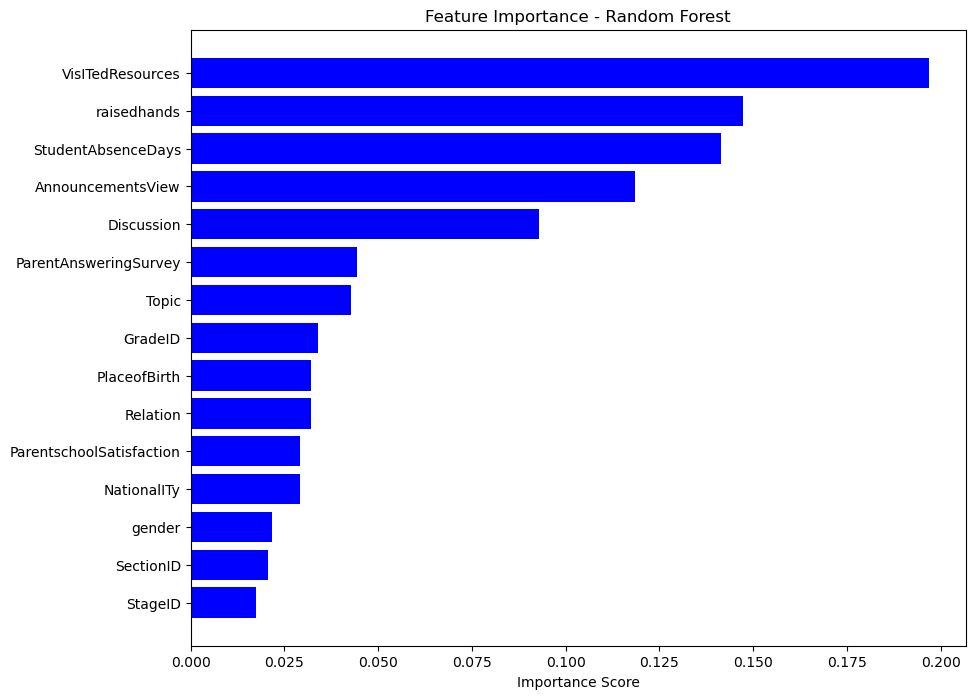

                     Feature  Importance
1           VisITedResources    0.196765
0                raisedhands    0.147259
14        StudentAbsenceDays    0.141376
2          AnnouncementsView    0.118359
3                 Discussion    0.092854
12     ParentAnsweringSurvey    0.044414
10                     Topic    0.042661
8                    GradeID    0.034069
6               PlaceofBirth    0.032130
11                  Relation    0.031989
13  ParentschoolSatisfaction    0.029287
5                NationalITy    0.029077
4                     gender    0.021714
9                  SectionID    0.020574
7                    StageID    0.017472


In [86]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfmm_Stage = make_pipeline(preprocessingmm_Stage, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfmm_Stage.fit(X, y)

# Get feature importance scores from the Random Forest model
importances = rfmm_Stage.named_steps['randomforestclassifier'].feature_importances_

# Get the feature names after transformation
# For categorical features, since we use ordinal encoding, we can use the original feature names
num_features = num_colStage  # Your numerical features remain the same
cat_features = cat_colStage  # Categorical feature names remain the same

# Combine numerical and categorical feature names
feature_names = num_features + cat_features

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the sorted feature importance
print(feature_importance_df)

In [87]:
# Collecting features with importance above a threshold
feat_list = [(name, imp) for name, imp in zip(feature_names, importances)]
total_importance = sum(imp for name, imp in feat_list)

included_feats = [name for name, imp in feat_list if imp > 0.03]

print('\nCumulative Importance =', total_importance)

# Create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns=['FEATURE', 'IMPORTANCE']).\
                      sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
print(df_imp)


Cumulative Importance = 1.0
                     FEATURE  IMPORTANCE    CUMSUM
1           VisITedResources    0.196765  0.196765
0                raisedhands    0.147259  0.344024
14        StudentAbsenceDays    0.141376  0.485400
2          AnnouncementsView    0.118359  0.603759
3                 Discussion    0.092854  0.696612
12     ParentAnsweringSurvey    0.044414  0.741027
10                     Topic    0.042661  0.783688
8                    GradeID    0.034069  0.817758
6               PlaceofBirth    0.032130  0.849887
11                  Relation    0.031989  0.881876
13  ParentschoolSatisfaction    0.029287  0.911163
5                NationalITy    0.029077  0.940240
4                     gender    0.021714  0.961954
9                  SectionID    0.020574  0.982528
7                    StageID    0.017472  1.000000


In [88]:
print('Most Important Features:')
print(included_feats)
print('Number of Included Features =', len(included_feats))

Most Important Features:
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'PlaceofBirth', 'GradeID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'StudentAbsenceDays']
Number of Included Features = 10


In [89]:
dummy_clf = DummyClassifier()
rfmm_Stage_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfmm_Stage_scores = cross_validate(rfmm_Stage, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfmm_Stage_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_Stage_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_Stage_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_Stage_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_Stage_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfmm_Stage_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_Stage_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_Stage_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_Stage_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_Stage_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfmm_Stage_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfmm_Stage_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfmm_Stage_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfmm_Stage_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfmm_Stage_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.69230769 0.79487179 0.81578947 0.81578947 0.84210526 0.89473684
 0.65789474 0.78947368 0.76315789 0.78947368]
ROC AUC OVR scores: [0.86982814 0.893686   0.90956118 0.94755574 0.92460075 0.98378582
 0.87149482 0.93260281 0.91423438 0.93682949]
F1 Macro Scores: [0.68501817 0.7962963  0.81962482 0.815311   0.84918091 0.8998

In [90]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfss_Stage = make_pipeline(preprocessingss_Stage, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfss_Stage.fit(X, y)

dummy_clf = DummyClassifier()
rfss_Stage_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfss_Stage_scores = cross_validate(rfss_Stage, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfss_Stage_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_Stage_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_Stage_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_Stage_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_Stage_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfss_Stage_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_Stage_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_Stage_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_Stage_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_Stage_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfss_Stage_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfss_Stage_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfss_Stage_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfss_Stage_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfss_Stage_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.69230769 0.79487179 0.81578947 0.81578947 0.84210526 0.89473684
 0.65789474 0.78947368 0.76315789 0.78947368]
ROC AUC OVR scores: [0.86643362 0.89272596 0.9114286  0.94662203 0.92520227 0.98425268
 0.86989191 0.93420572 0.91902993 0.93588252]
F1 Macro Scores: [0.68501817 0.7962963  0.81962482 0.815311   0.84918091 0.8998

### <u>Random Forest(Dropped Semester & StageID)</u>

In [91]:
# Define columns
# Define columns
num_col_SS = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
cat_col_SS = ['gender', 'NationalITy', 'PlaceofBirth', 'GradeID', 'SectionID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Define ColumnTransformer to include both numerical and categorical columns
preprocessingss_SS = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_col_SS),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col_SS)               # Pass through categorical columns (already encoded)
    ]
)

preprocessingmm_SS = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_col_SS),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col_SS)               # Pass through categorical columns (already encoded)
    ]
)

# Prepare features and target variable
X = train_set.drop("Class", axis=1)  # Drop the target column 'Class'
y = train_set["Class"].copy()  # Target variable

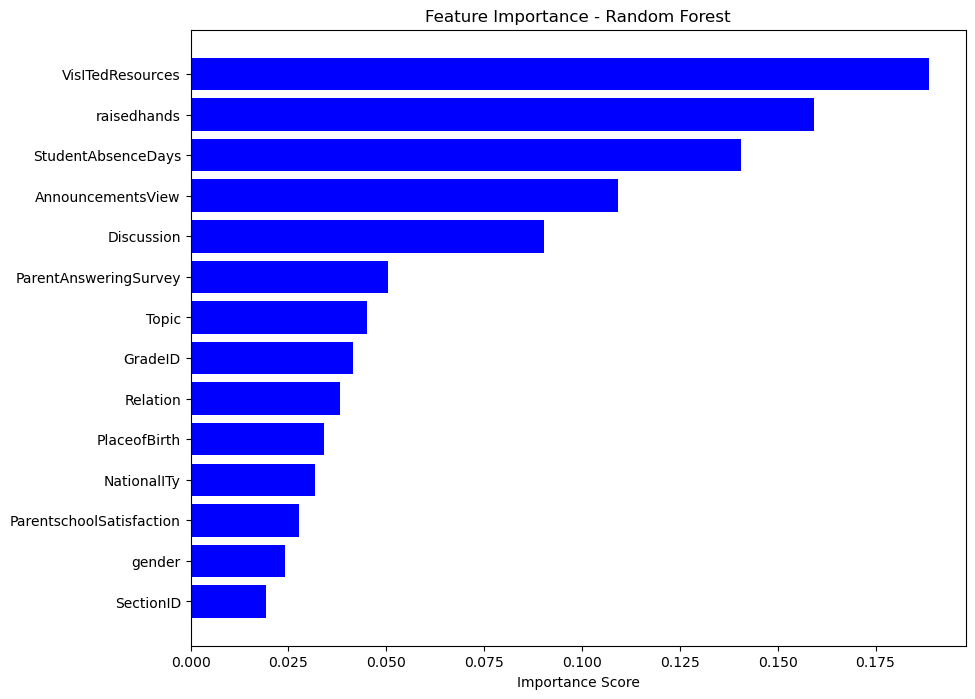

                     Feature  Importance
1           VisITedResources    0.188586
0                raisedhands    0.159239
13        StudentAbsenceDays    0.140669
2          AnnouncementsView    0.109323
3                 Discussion    0.090224
11     ParentAnsweringSurvey    0.050441
9                      Topic    0.045116
7                    GradeID    0.041381
10                  Relation    0.038248
6               PlaceofBirth    0.033958
5                NationalITy    0.031790
12  ParentschoolSatisfaction    0.027618
4                     gender    0.024040
8                  SectionID    0.019366


In [92]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfmm_SS = make_pipeline(preprocessingmm_SS, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfmm_SS.fit(X, y)

# Get feature importance scores from the Random Forest model
importances = rfmm_SS.named_steps['randomforestclassifier'].feature_importances_

# Get the feature names after transformation
# For categorical features, since we use ordinal encoding, we can use the original feature names
num_features = num_col_SS  # Your numerical features remain the same
cat_features = cat_col_SS  # Categorical feature names remain the same

# Combine numerical and categorical feature names
feature_names = num_features + cat_features

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the sorted feature importance
print(feature_importance_df)

In [93]:
# Collecting features with importance above a threshold
feat_list = [(name, imp) for name, imp in zip(feature_names, importances)]
total_importance = sum(imp for name, imp in feat_list)

included_feats = [name for name, imp in feat_list if imp > 0.03]

print('\nCumulative Importance =', total_importance)

# Create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns=['FEATURE', 'IMPORTANCE']).\
                      sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
print(df_imp)


Cumulative Importance = 1.0
                     FEATURE  IMPORTANCE    CUMSUM
1           VisITedResources    0.188586  0.188586
0                raisedhands    0.159239  0.347826
13        StudentAbsenceDays    0.140669  0.488495
2          AnnouncementsView    0.109323  0.597818
3                 Discussion    0.090224  0.688042
11     ParentAnsweringSurvey    0.050441  0.738484
9                      Topic    0.045116  0.783600
7                    GradeID    0.041381  0.824981
10                  Relation    0.038248  0.863229
6               PlaceofBirth    0.033958  0.897187
5                NationalITy    0.031790  0.928977
12  ParentschoolSatisfaction    0.027618  0.956595
4                     gender    0.024040  0.980634
8                  SectionID    0.019366  1.000000


In [94]:
print('Most Important Features:')
print(included_feats)
print('Number of Included Features =', len(included_feats))

Most Important Features:
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy', 'PlaceofBirth', 'GradeID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'StudentAbsenceDays']
Number of Included Features = 11


In [95]:
dummy_clf = DummyClassifier()
rfmm_SS_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfmm_SS_scores = cross_validate(rfmm_SS, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfmm_SS_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_SS_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_SS_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_SS_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_SS_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfmm_SS_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_SS_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_SS_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_SS_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_SS_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfmm_SS_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfmm_SS_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfmm_SS_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfmm_SS_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfmm_SS_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.76923077 0.74358974 0.86842105 0.84210526 0.76315789 0.86842105
 0.68421053 0.73684211 0.81578947 0.81578947]
ROC AUC OVR scores: [0.88112534 0.88831302 0.90400975 0.93278773 0.91980983 0.9752433
 0.87890235 0.92034285 0.91985445 0.94299693]
F1 Macro Scores: [0.77059356 0.75       0.87301587 0.84085213 0.77249157 0.87721

In [96]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfss_SS = make_pipeline(preprocessingss, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfss_SS.fit(X, y)

dummy_clf = DummyClassifier()
rfss_SS_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfss_SS_scores = cross_validate(rfss_SS, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfss_SS_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_SS_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_SS_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_SS_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_SS_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfss_SS_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_SS_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_SS_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_SS_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_SS_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfss_SS_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfss_SS_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfss_SS_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfss_SS_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfss_SS_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.74358974 0.74358974 0.76315789 0.84210526 0.81578947 0.92105263
 0.63157895 0.78947368 0.76315789 0.81578947]
ROC AUC OVR scores: [0.87514272 0.87745108 0.90624971 0.92922891 0.92340895 0.97751472
 0.88721938 0.92134983 0.89771028 0.93409577]
F1 Macro Scores: [0.74056353 0.75       0.76507937 0.84085213 0.82596575 0.9244

### <u>Random Forest(Dropped Semester, StageID & SectionID)</u>

In [97]:
# Define columns
# Define columns
num_col_SSS = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
cat_col_SSS = ['gender', 'NationalITy', 'PlaceofBirth', 'GradeID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Define ColumnTransformer to include both numerical and categorical columns
preprocessingss_SSS = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_col_SSS),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col_SSS)               # Pass through categorical columns (already encoded)
    ]
)

preprocessingmm_SSS = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_col_SSS),         # Scale numerical columns
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_col_SSS)               # Pass through categorical columns (already encoded)
    ]
)

# Prepare features and target variable
X = train_set.drop("Class", axis=1)  # Drop the target column 'Class'
y = train_set["Class"].copy()  # Target variable

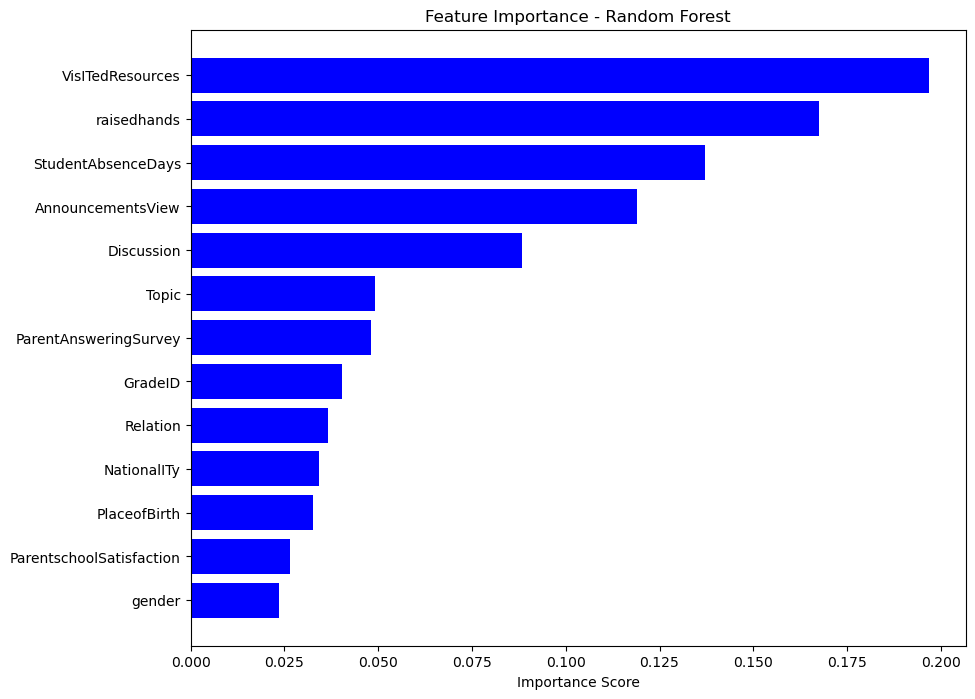

                     Feature  Importance
1           VisITedResources    0.196738
0                raisedhands    0.167630
12        StudentAbsenceDays    0.137147
2          AnnouncementsView    0.118967
3                 Discussion    0.088336
8                      Topic    0.049140
10     ParentAnsweringSurvey    0.048164
7                    GradeID    0.040241
9                   Relation    0.036500
5                NationalITy    0.034315
6               PlaceofBirth    0.032609
11  ParentschoolSatisfaction    0.026580
4                     gender    0.023632


In [98]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfmm_SSS = make_pipeline(preprocessingmm_SSS, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfmm_SSS.fit(X, y)

# Get feature importance scores from the Random Forest model
importances = rfmm_SSS.named_steps['randomforestclassifier'].feature_importances_

# Get the feature names after transformation
# For categorical features, since we use ordinal encoding, we can use the original feature names
num_features = num_col_SSS  # Your numerical features remain the same
cat_features = cat_col_SSS  # Categorical feature names remain the same

# Combine numerical and categorical feature names
feature_names = num_features + cat_features

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display the sorted feature importance
print(feature_importance_df)

In [99]:
# Collecting features with importance above a threshold
feat_list = [(name, imp) for name, imp in zip(feature_names, importances)]
total_importance = sum(imp for name, imp in feat_list)

included_feats = [name for name, imp in feat_list if imp > 0.03]

print('\nCumulative Importance =', total_importance)

# Create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns=['FEATURE', 'IMPORTANCE']).\
                      sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
print(df_imp)


Cumulative Importance = 1.0
                     FEATURE  IMPORTANCE    CUMSUM
1           VisITedResources    0.196738  0.196738
0                raisedhands    0.167630  0.364368
12        StudentAbsenceDays    0.137147  0.501515
2          AnnouncementsView    0.118967  0.620482
3                 Discussion    0.088336  0.708819
8                      Topic    0.049140  0.757958
10     ParentAnsweringSurvey    0.048164  0.806122
7                    GradeID    0.040241  0.846363
9                   Relation    0.036500  0.882863
5                NationalITy    0.034315  0.917178
6               PlaceofBirth    0.032609  0.949787
11  ParentschoolSatisfaction    0.026580  0.976368
4                     gender    0.023632  1.000000


In [100]:
print('Most Important Features:')
print(included_feats)
print('Number of Included Features =', len(included_feats))

Most Important Features:
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy', 'PlaceofBirth', 'GradeID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'StudentAbsenceDays']
Number of Included Features = 11


In [101]:
dummy_clf = DummyClassifier()
rfmm_SSS_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfmm_SSS_scores = cross_validate(rfmm_SSS, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfmm_SSS_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_SSS_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_SSS_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_SSS_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_SSS_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfmm_SSS_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfmm_SSS_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfmm_SSS_scores['test_f1_macro'])
print("Precision Macro Scores:", rfmm_SSS_scores['test_precision_macro'])
print("Recall Macro Scores:", rfmm_SSS_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfmm_SSS_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfmm_SSS_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfmm_SSS_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfmm_SSS_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfmm_SSS_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.74358974 0.76923077 0.81578947 0.81578947 0.78947368 0.89473684
 0.68421053 0.73684211 0.76315789 0.78947368]
ROC AUC OVR scores: [0.8716115  0.87199132 0.89578559 0.9410706  0.93255299 0.9831843
 0.85817759 0.92786901 0.92429896 0.93380717]
F1 Macro Scores: [0.74722434 0.77238108 0.81962482 0.815311   0.79675114 0.90117

In [102]:
# Create a pipeline with preprocessing and RandomForestClassifier
rfss_SSS = make_pipeline(preprocessingss_SSS, RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced'))
rfss_SSS.fit(X, y)

dummy_clf = DummyClassifier()
rfss_SSS_dummy_scores = cross_validate(dummy_clf, 
                            X, y,
                            scoring=scoring,
                            cv=10)

rfss_SSS_scores = cross_validate(rfss_SSS, 
                            X, y,
                            scoring=scoring,
                            cv=10)

print("Random Forest Classifier Score:")
print("Accuracy Scores:", rfss_SSS_dummy_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_SSS_dummy_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_SSS_dummy_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_SSS_dummy_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_SSS_dummy_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Accuracy Scores:", rfss_SSS_scores['test_accuracy'])
print("ROC AUC OVR scores:", rfss_SSS_scores['test_roc_auc_ovr'])
print("F1 Macro Scores:", rfss_SSS_scores['test_f1_macro'])
print("Precision Macro Scores:", rfss_SSS_scores['test_precision_macro'])
print("Recall Macro Scores:", rfss_SSS_scores['test_recall_macro'])

print("\nRandom Forest Classifier Score:")
print("Mean Accuracy scores:", np.mean(rfss_SSS_scores['test_accuracy']))
print("Mean ROC AUC OVR scores:", np.mean(rfss_SSS_scores['test_roc_auc_ovr']))
print("Mean F1 Macro scores:", np.mean(rfss_SSS_scores['test_f1_macro']))
print("Mean Precision Macro scores:", np.mean(rfss_SSS_scores['test_precision_macro']))
print("Mean Recall Macro scores:", np.mean(rfss_SSS_scores['test_recall_macro']))

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ken Wai\anaconda3\Lib\sit

Random Forest Classifier Score:
Accuracy Scores: [0.43589744 0.43589744 0.44736842 0.44736842 0.44736842 0.44736842
 0.42105263 0.42105263 0.42105263 0.42105263]
ROC AUC OVR scores: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
F1 Macro Scores: [0.20238095 0.20238095 0.20606061 0.20606061 0.20606061 0.20606061
 0.19753086 0.19753086 0.19753086 0.19753086]
Precision Macro Scores: [0.14529915 0.14529915 0.14912281 0.14912281 0.14912281 0.14912281
 0.14035088 0.14035088 0.14035088 0.14035088]
Recall Macro Scores: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]

Random Forest Classifier Score:
Accuracy Scores: [0.74358974 0.76923077 0.81578947 0.81578947 0.78947368 0.92105263
 0.68421053 0.76315789 0.76315789 0.76315789]
ROC AUC OVR scores: [0.87078901 0.86962562 0.89625244 0.9401369  0.93582097 0.98518638
 0.85811688 0.92792971 0.92483315 0.9357011 ]
F1 Macro Scores: [0.74722434 0.77238108 0.81962482 0.815311   0.79675114 0.9244

## <u>Hyperparameter Tuning</u>

In [103]:
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ("preprocessing", preprocessingss_SS),
    ("random_forest", RandomForestClassifier(random_state=42)),
])

rfparam_grid={'random_forest__max_depth': [3, 5, 10, None],
              'random_forest__n_estimators': [10, 100, 200],
              'random_forest__max_features': [1, 3, 5, 7, 9, 11],
              'random_forest__min_samples_leaf': [1, 2, 3],
              'random_forest__min_samples_split': [2, 3]  # Corrected to valid values
             }

rf_grid_search = GridSearchCV(rf_pipeline, rfparam_grid, cv=10,
                           scoring=scoring, refit='f1_macro')

rf_grid_search.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['raisedhands',
                                                                          'VisITedResources',
                                                                          'AnnouncementsView',
                                                                          'Discussion']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'NationalITy',
                                                                          'PlaceofBirth',
                                                                          'GradeID',
                                                                          'SectionID',
                                                                          'Topic',
                                                                          'Relation',
                                                                          'ParentA...
             param_grid={'random_forest__max_depth': [3, 5, 10, None],
                         'random_forest__max_features': [1, 3, 5, 7, 9, 11],
                         'random_forest__min_samples_leaf': [1, 2, 3],
                         'random_forest__min_samples_split': [2, 3],
                         'random_forest__n_estimators': [10, 100, 200]},
             refit='f1_macro',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [104]:
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best score for Random Forest: ", rf_grid_search.best_score_)

Best parameters for Random Forest:  {'random_forest__max_depth': None, 'random_forest__max_features': 3, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 3, 'random_forest__n_estimators': 100}
Best score for Random Forest:  0.806693737091166


In [105]:
lrCV_pipeline = Pipeline([
    ("preprocessing", preprocessingss_SS),
    ("LogisticRegressionCV", LogisticRegressionCV(random_state=42, cv=10)),
])

lrCVparam_grid={'LogisticRegressionCV__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
                'LogisticRegressionCV__max_iter': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
                'LogisticRegressionCV__multi_class': ['multinomial']
               }

lrCV_grid_search = GridSearchCV(lrCV_pipeline, lrCVparam_grid, cv=10,
                                scoring=scoring, refit='f1_macro')

# Fit the model
lrCV_grid_search.fit(X, y)

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['raisedhands',
                                                                          'VisITedResources',
                                                                          'AnnouncementsView',
                                                                          'Discussion']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'NationalITy',
                                                                          'PlaceofBirth',
                                                                          'GradeID',
                                                                          'SectionID',
                                                                          'Topic',
                                                                          'Relation',
                                                                          'ParentA...
             param_grid={'LogisticRegressionCV__max_iter': [100, 150, 200, 250,
                                                            300, 350, 400, 450,
                                                            500, 550, 600],
                         'LogisticRegressionCV__multi_class': ['multinomial'],
                         'LogisticRegressionCV__solver': ['lbfgs', 'newton-cg',
                                                          'sag', 'saga']},
             refit='f1_macro',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [106]:
# Get best parameters
print("Best Parameters:", lrCV_grid_search.best_params_)
print("Best Cross-Validation F1 Macro Score:", lrCV_grid_search.best_score_)

Best Parameters: {'LogisticRegressionCV__max_iter': 100, 'LogisticRegressionCV__multi_class': 'multinomial', 'LogisticRegressionCV__solver': 'lbfgs'}
Best Cross-Validation F1 Macro Score: 0.7405787618960887


In [107]:
mlp_pipeline = Pipeline([
    ("preprocessing", preprocessingss_SS),
    ("mlp", MLPClassifier(random_state=42)),
])

mlpparam_grid={'mlp__solver': ['lbfgs'],
               'mlp__max_iter': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
               'mlp__hidden_layer_sizes': np.arange(10, 15),
               'mlp__learning_rate_init': [0.001, 0.01, 0.1, 1, 10]
             }

mlp_grid_search = GridSearchCV(mlp_pipeline, mlpparam_grid, cv=10,
                               scoring=scoring, refit='f1_macro')

mlp_grid_search.fit(X, y)

C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ken Wai\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['raisedhands',
                                                                          'VisITedResources',
                                                                          'AnnouncementsView',
                                                                          'Discussion']),
                                                                        ('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender',
                                                                          'NationalITy',
                                                                          'PlaceofBirth',
                                                                          'GradeID',
                                                                          'SectionID',
                                                                          'Topic',
                                                                          'Relation',
                                                                          'ParentA...
             param_grid={'mlp__hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'mlp__learning_rate_init': [0.001, 0.01, 0.1, 1, 10],
                         'mlp__max_iter': [1000, 1100, 1200, 1300, 1400, 1500,
                                           1600, 1700, 1800, 1900, 2000],
                         'mlp__solver': ['lbfgs']},
             refit='f1_macro',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [108]:
# Get best parameters
print("Best Parameters:", mlp_grid_search.best_params_)
print("Best Cross-Validation F1 Macro Score:", mlp_grid_search.best_score_)

Best Parameters: {'mlp__hidden_layer_sizes': 14, 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 1000, 'mlp__solver': 'lbfgs'}
Best Cross-Validation F1 Macro Score: 0.7233579828938559


# <u>7.0 Evaluate on Test Set</u>

In [110]:
# Prepare the features and target variable for the training set
X_train = train_set.drop("Class", axis=1)
y_train = train_set["Class"].copy()

# Prepare the features and target variable for the test set
X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"].copy()

# Extract the best parameters from the grid search
best_params = rf_grid_search.best_params_

# Build the final RandomForestClassifier model using the best parameters
final_rf_model = RandomForestClassifier(
    max_depth=best_params['random_forest__max_depth'],
    n_estimators=best_params['random_forest__n_estimators'],
    max_features=best_params['random_forest__max_features'],
    min_samples_leaf=best_params['random_forest__min_samples_leaf'],
    min_samples_split=best_params['random_forest__min_samples_split'],
    random_state=42  # Use the same random state for reproducibility
)

# Create the final pipeline with preprocessing and the tuned RandomForest model
final_rf_pipeline = Pipeline([
    ("preprocessing", preprocessingss_SS),
    ("random_forest", final_rf_model)
])

# Fit the final model on the entire training set
final_rf_pipeline.fit(X, y)

# Now, evaluate the model on the test set
test_predictions = final_rf_pipeline.predict(X_test)

# You can evaluate the performance using metrics such as accuracy, F1-score, etc.
from sklearn.metrics import accuracy_score, f1_score

# Accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy: ", test_accuracy)

# F1 Macro Score
test_f1_macro = f1_score(y_test, test_predictions, average='macro')
print("Test F1 Macro Score: ", test_f1_macro)

Test Accuracy:  0.84375
Test F1 Macro Score:  0.8467711598746082
